In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.ioff()
figure(figsize=(10, 8), dpi=300)

<Figure size 3000x2400 with 0 Axes>

<Figure size 3000x2400 with 0 Axes>

In [3]:
job_arg = 8
# uncomment lines below to use CUDA
mne.utils.set_config('MNE_USE_CUDA', 'true')
job_arg = 'cuda'

# disable lines below to enable interactive plots
mne.set_config('MNE_BROWSER_BACKEND', 'matplotlib')
mne.viz.set_browser_backend('matplotlib')

Using matplotlib as 2D backend.


In [32]:
# read mne-python format
raw = mne.io.read_raw_fif('../data_nn/grasp_between_1_raw.fif')

raw.info['chs'][13]['kind'] = raw.info['chs'][12]['kind']
raw.info['chs'][13]['coil_type'] = raw.info['chs'][12]['coil_type']
for fname in [
  '../data_nn/grasp_between_2_raw.fif',
  '../data_nn/grasp_between_3_raw.fif',
  '../data_nn/grasp_between_4_raw.fif',
  '../data_nn/grasp_between_5_raw.fif',
  '../data_nn/grasp_between_6_raw.fif',
  '../data_nn/grasp_between_7_raw.fif'
  ]:
  raw_add = mne.io.read_raw_fif(fname)
  raw.append(raw_add)


#raw_a = mne.io.read_raw_fif('../data/OBCI_16_raw.fif')
#raw = mne.io.concatenate_raws([raw_l, raw_a])
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False, on_missing='ignore')
raw.load_data()
raw.pick_types(emg=True, eeg=True, stim=True, exclude=[])


raw_clench = mne.io.read_raw_fif('../data_nn_temp/grasp_a_2_Xraw.fif')

raw_clench.info['chs'][13]['kind'] = raw_clench.info['chs'][12]['kind']
raw_clench.info['chs'][13]['coil_type'] = raw_clench.info['chs'][12]['coil_type']
for fname in [
  '../data_nn_temp/grasp_a_1_Xraw.fif',  
  '../data_nn_temp/grasp_l_1_Xraw.fif', 
  '../data_nn_temp/grasp_l_2_Xraw.fif',
]:
  raw_add = mne.io.read_raw_fif(fname)
  raw_clench.append(raw_add)


#raw_a = mne.io.read_raw_fif('../data/OBCI_16_raw.fif')
#raw = mne.io.concatenate_raws([raw_l, raw_a])
montage = mne.channels.make_standard_montage('standard_1020')
raw_clench.set_montage(montage, verbose=False, on_missing='ignore')
raw_clench.load_data()
raw_clench.pick_types(emg=True, eeg=True, stim=True, exclude=[])


Opening raw data file ../data_nn/grasp_between_1_raw.fif...
Isotrak not found
    Range : 0 ... 1336504 =      0.000 ...  1336.504 secs
Ready.
Opening raw data file ../data_nn/grasp_between_2_raw.fif...
Isotrak not found
    Range : 0 ... 960719 =      0.000 ...   960.719 secs
Ready.
Opening raw data file ../data_nn/grasp_between_3_raw.fif...
Isotrak not found
    Range : 0 ... 974338 =      0.000 ...   974.338 secs
Ready.
Opening raw data file ../data_nn/grasp_between_4_raw.fif...
Isotrak not found
    Range : 0 ... 895632 =      0.000 ...   895.632 secs
Ready.
Opening raw data file ../data_nn/grasp_between_5_raw.fif...
Isotrak not found
    Range : 0 ... 960089 =      0.000 ...   960.089 secs
Ready.
Opening raw data file ../data_nn/grasp_between_6_raw.fif...
Isotrak not found
    Range : 0 ... 947899 =      0.000 ...   947.899 secs
Ready.
Opening raw data file ../data_nn/grasp_between_7_raw.fif...
Isotrak not found
    Range : 0 ... 942145 =      0.000 ...   942.145 secs
Ready.
Readi

<Raw | grasp_a_2_Xraw.fif, 17 x 4045523 (4045.5 s), ~524.7 MB, data loaded>

In [103]:
# raw.pick_types(emg=True, eeg=False, stim=True, exclude=[])
# p = raw.plot(start = 307, duration = 4, scalings = dict(emg = 10e-4), theme = 'dark', show = False)
# p.set_figheight(8)
# p.set_figwidth(4)
# p.set_dpi(300)
# p.show()

# raw.pick_types(emg=True, eeg=True, stim=True, exclude=[])
# # plt = raw.plot_psd(fmax=60.)
# plt = raw.plot_psd(fmax=60., average=True)
# plt = raw.plot_psd(fmin=90., fmax=500.0)
# plt = raw.plot_psd(fmin=90., fmax=500., average=True)
# figplt = raw.plot_psd(fmax=60.)

In [54]:
print(mne.get_config(key=''))

('MNE_3D_OPTION_ANTIALIAS', 'MNE_3D_OPTION_DEPTH_PEELING', 'MNE_3D_OPTION_SMOOTH_SHADING', 'MNE_3D_OPTION_THEME', 'MNE_BROWSE_RAW_SIZE', 'MNE_BROWSER_BACKEND', 'MNE_BROWSER_PRECOMPUTE', 'MNE_BROWSER_THEME', 'MNE_BROWSER_USE_OPENGL', 'MNE_CACHE_DIR', 'MNE_COREG_ADVANCED_RENDERING', 'MNE_COREG_COPY_ANNOT', 'MNE_COREG_GUESS_MRI_SUBJECT', 'MNE_COREG_HEAD_HIGH_RES', 'MNE_COREG_HEAD_OPACITY', 'MNE_COREG_HEAD_INSIDE', 'MNE_COREG_INTERACTION', 'MNE_COREG_MARK_INSIDE', 'MNE_COREG_PREPARE_BEM', 'MNE_COREG_ORIENT_TO_SURFACE', 'MNE_COREG_SCALE_LABELS', 'MNE_COREG_SCALE_BY_DISTANCE', 'MNE_COREG_SCENE_SCALE', 'MNE_COREG_WINDOW_HEIGHT', 'MNE_COREG_WINDOW_WIDTH', 'MNE_COREG_SUBJECTS_DIR', 'MNE_CUDA_DEVICE', 'MNE_CUDA_IGNORE_PRECISION', 'MNE_DATA', 'MNE_DATASETS_BRAINSTORM_PATH', 'MNE_DATASETS_EEGBCI_PATH', 'MNE_DATASETS_EPILEPSY_ECOG_PATH', 'MNE_DATASETS_HF_SEF_PATH', 'MNE_DATASETS_MEGSIM_PATH', 'MNE_DATASETS_MISC_PATH', 'MNE_DATASETS_MTRF_PATH', 'MNE_DATASETS_SAMPLE_PATH', 'MNE_DATASETS_SOMATO_PATH',

before doing the other method let's try a different way to detect / filter bad stuff

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Using CUDA for FFT FIR filtering
Filtering raw data in 7 contiguous segments
Setting up band-pass filter from 0.1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 33001 samples (33.001 sec)

Effective window size 

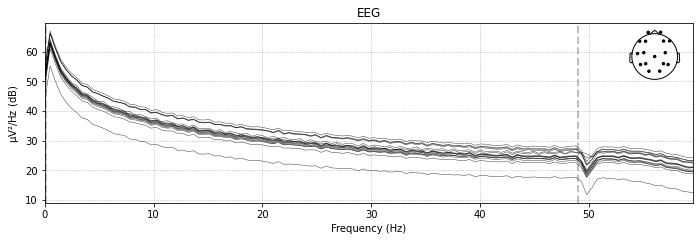

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Using CUDA for FFT FIR filtering
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 33001 samples (33.001 sec)

Effective window size 

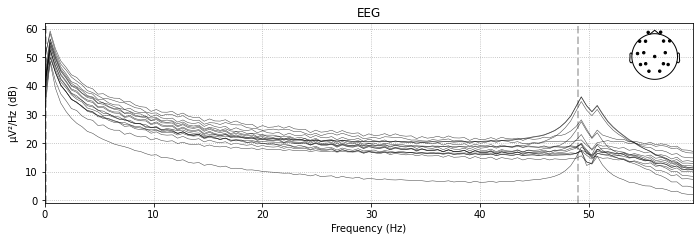

In [33]:

# filter_params = mne.filter.create_filter(raw.get_data(), raw.info['sfreq'],
#                                          l_freq=0.1, h_freq=49.)

# fig = mne.viz.plot_filter(filter_params, raw.info['sfreq'], flim=(0.01, 62), show = False)
# fig.set_figheight(4)
# fig.set_figwidth(4)
# fig.set_dpi(300)
# fig.show()

freqs = np.arange(50., 451., 50.)
#notch_widths = freqs/200.

raw.notch_filter(freqs, picks = ['eeg'],  n_jobs=job_arg)

raw.filter(l_freq=0.1, h_freq=49.)

figplt = raw.plot_psd(fmax=60.)

raw_clench.notch_filter(freqs, picks = ['eeg'],  n_jobs=job_arg)
raw_clench.filter(l_freq=0.1, h_freq=49.)

figplt = raw_clench.plot_psd(fmax=60.)



In [43]:
event_ids = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
}

events = mne.find_events(raw)
reject = dict(eeg=150e-5)
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True, reject=reject, tmin = -0.1, tmax=1, picks = ['EMG1'])
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds = epochs.resample(sfreq=128., n_jobs=job_arg)

event_ids_clench = {
    'clench': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
}

events_clench = mne.find_events(raw_clench)
reject = dict(eeg=150e-5)
epochs_clench = mne.Epochs(raw_clench, events_clench, event_id=event_ids_clench, preload=True, reject=reject, tmin = -0.1, tmax=1, picks = ['EMG1'])
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds_clench = epochs_clench.resample(sfreq=128., n_jobs=job_arg)


1947 events found
Event IDs: [ 53 102 107 108 110 111 113 114]
Not setting metadata
1782 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1782 events and 1101 original time points ...
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
    Rejecting  epoch based on EEG : ['EMG1']
20 bad epochs drop

Not setting metadata
196 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  pltimg = mne.viz.plot_epochs_image(rest_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Rest')
C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
191 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:13: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  pltimg = mne.viz.plot_epochs_image(right_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Right')


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()
C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:23: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  pltimg = mne.viz.plot_epochs_image(clench_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Clench')
C:\Users\webma\AppData\Local\Temp\ipykernel_29208\1008175996.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


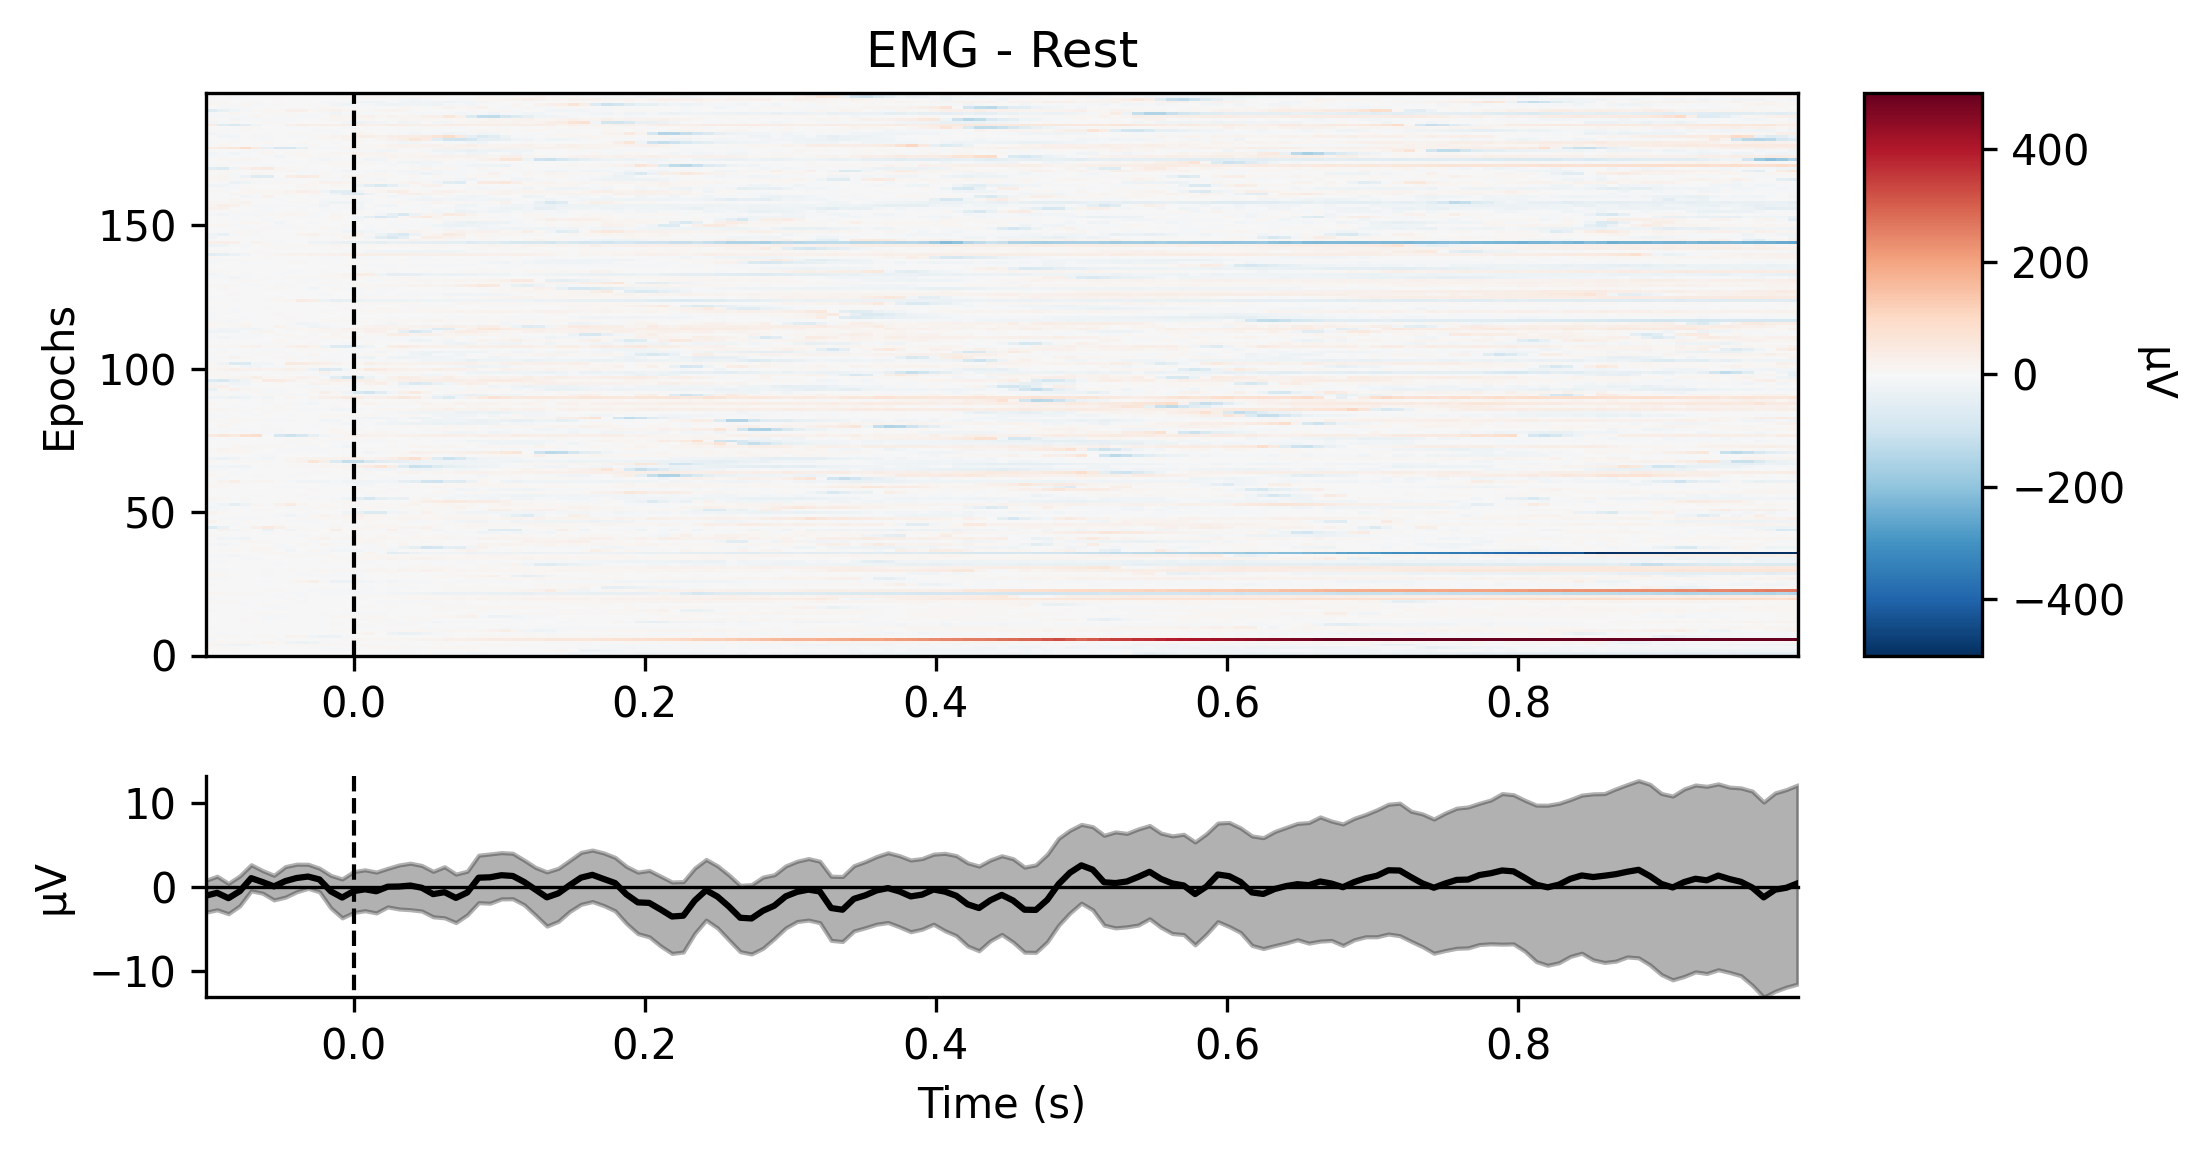

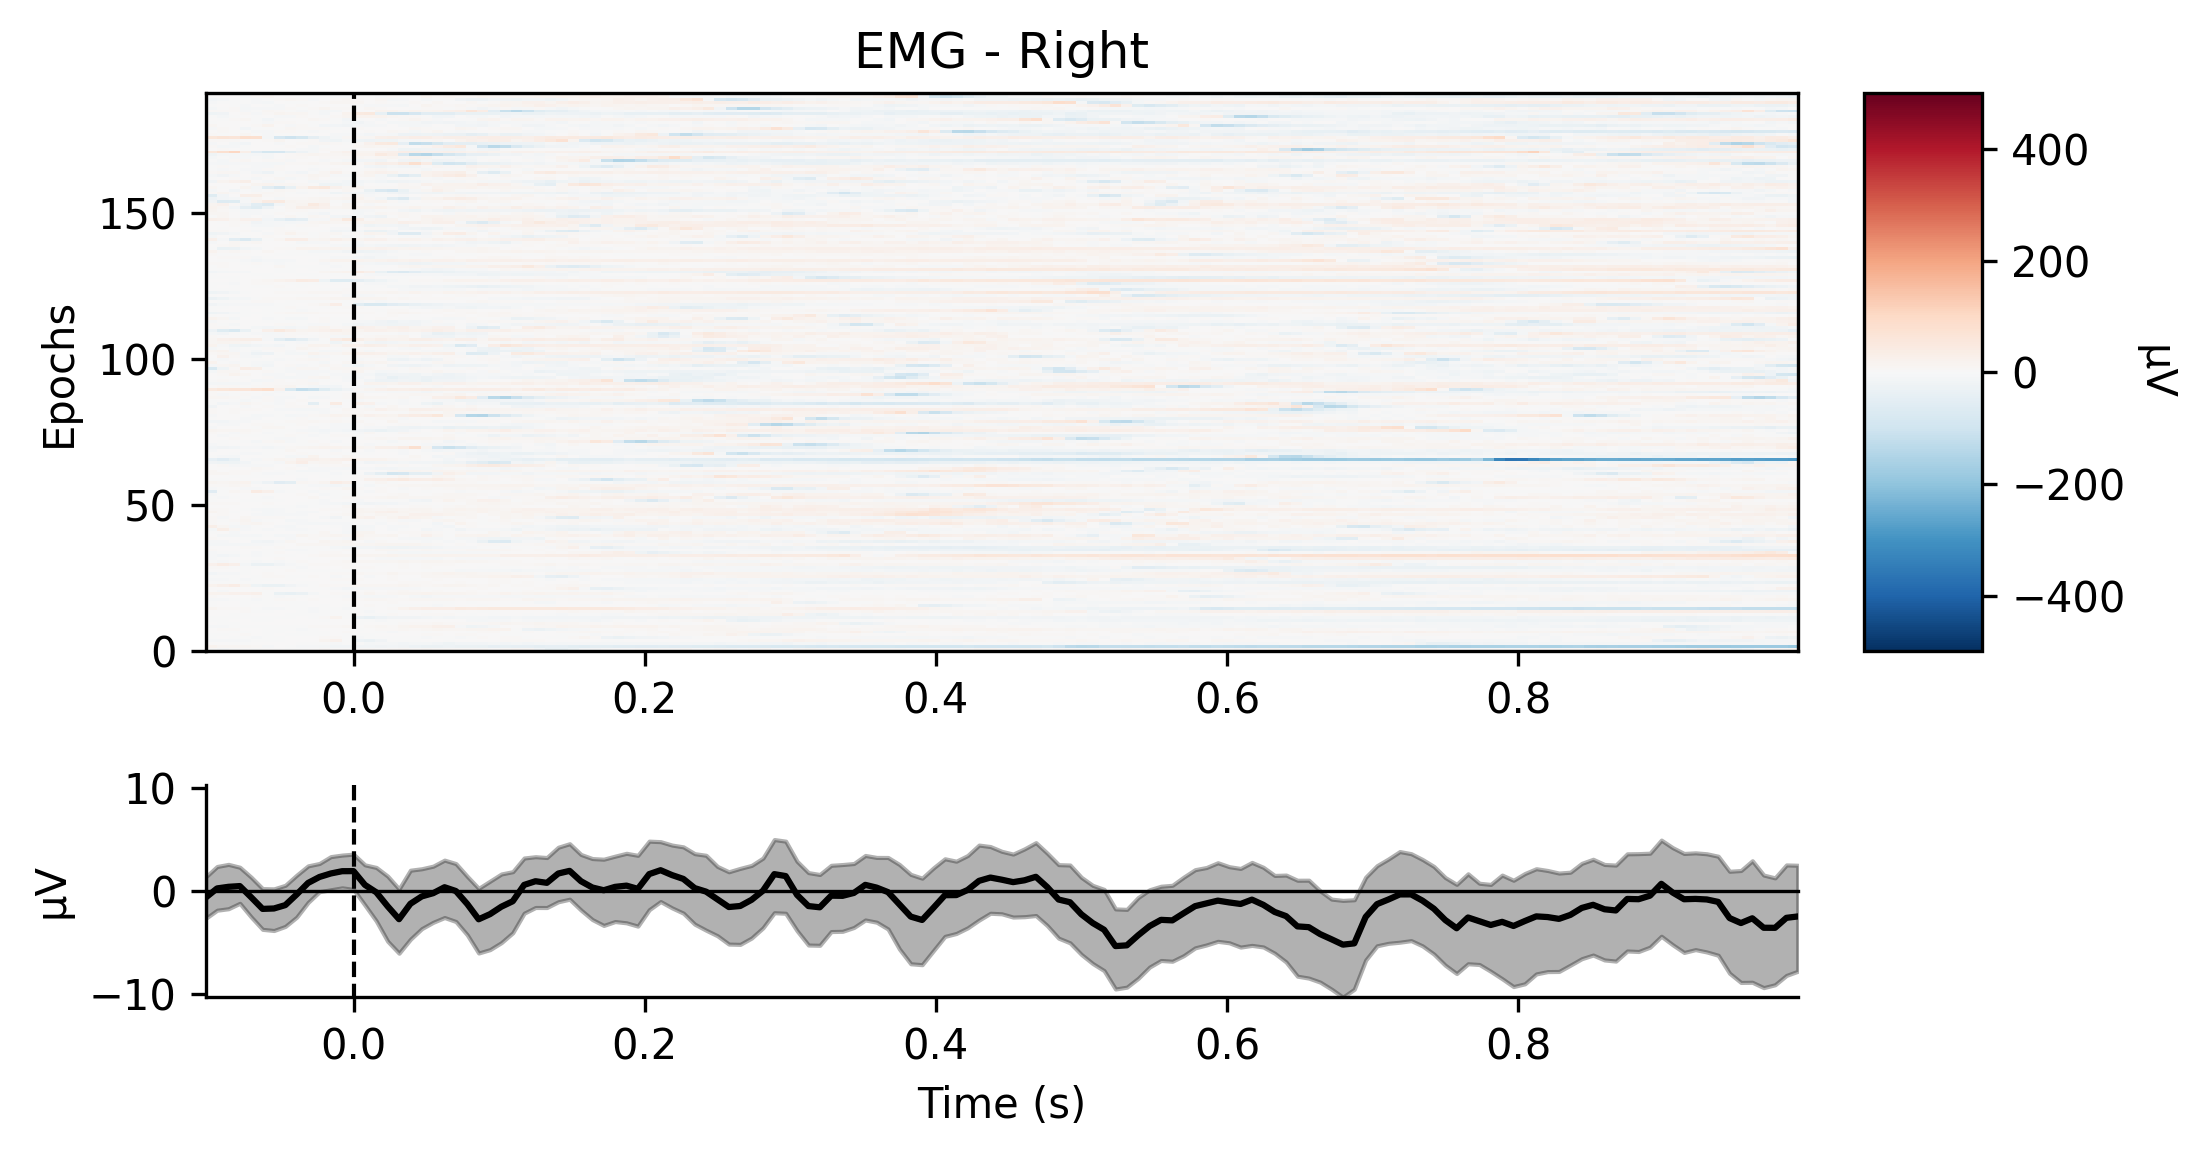

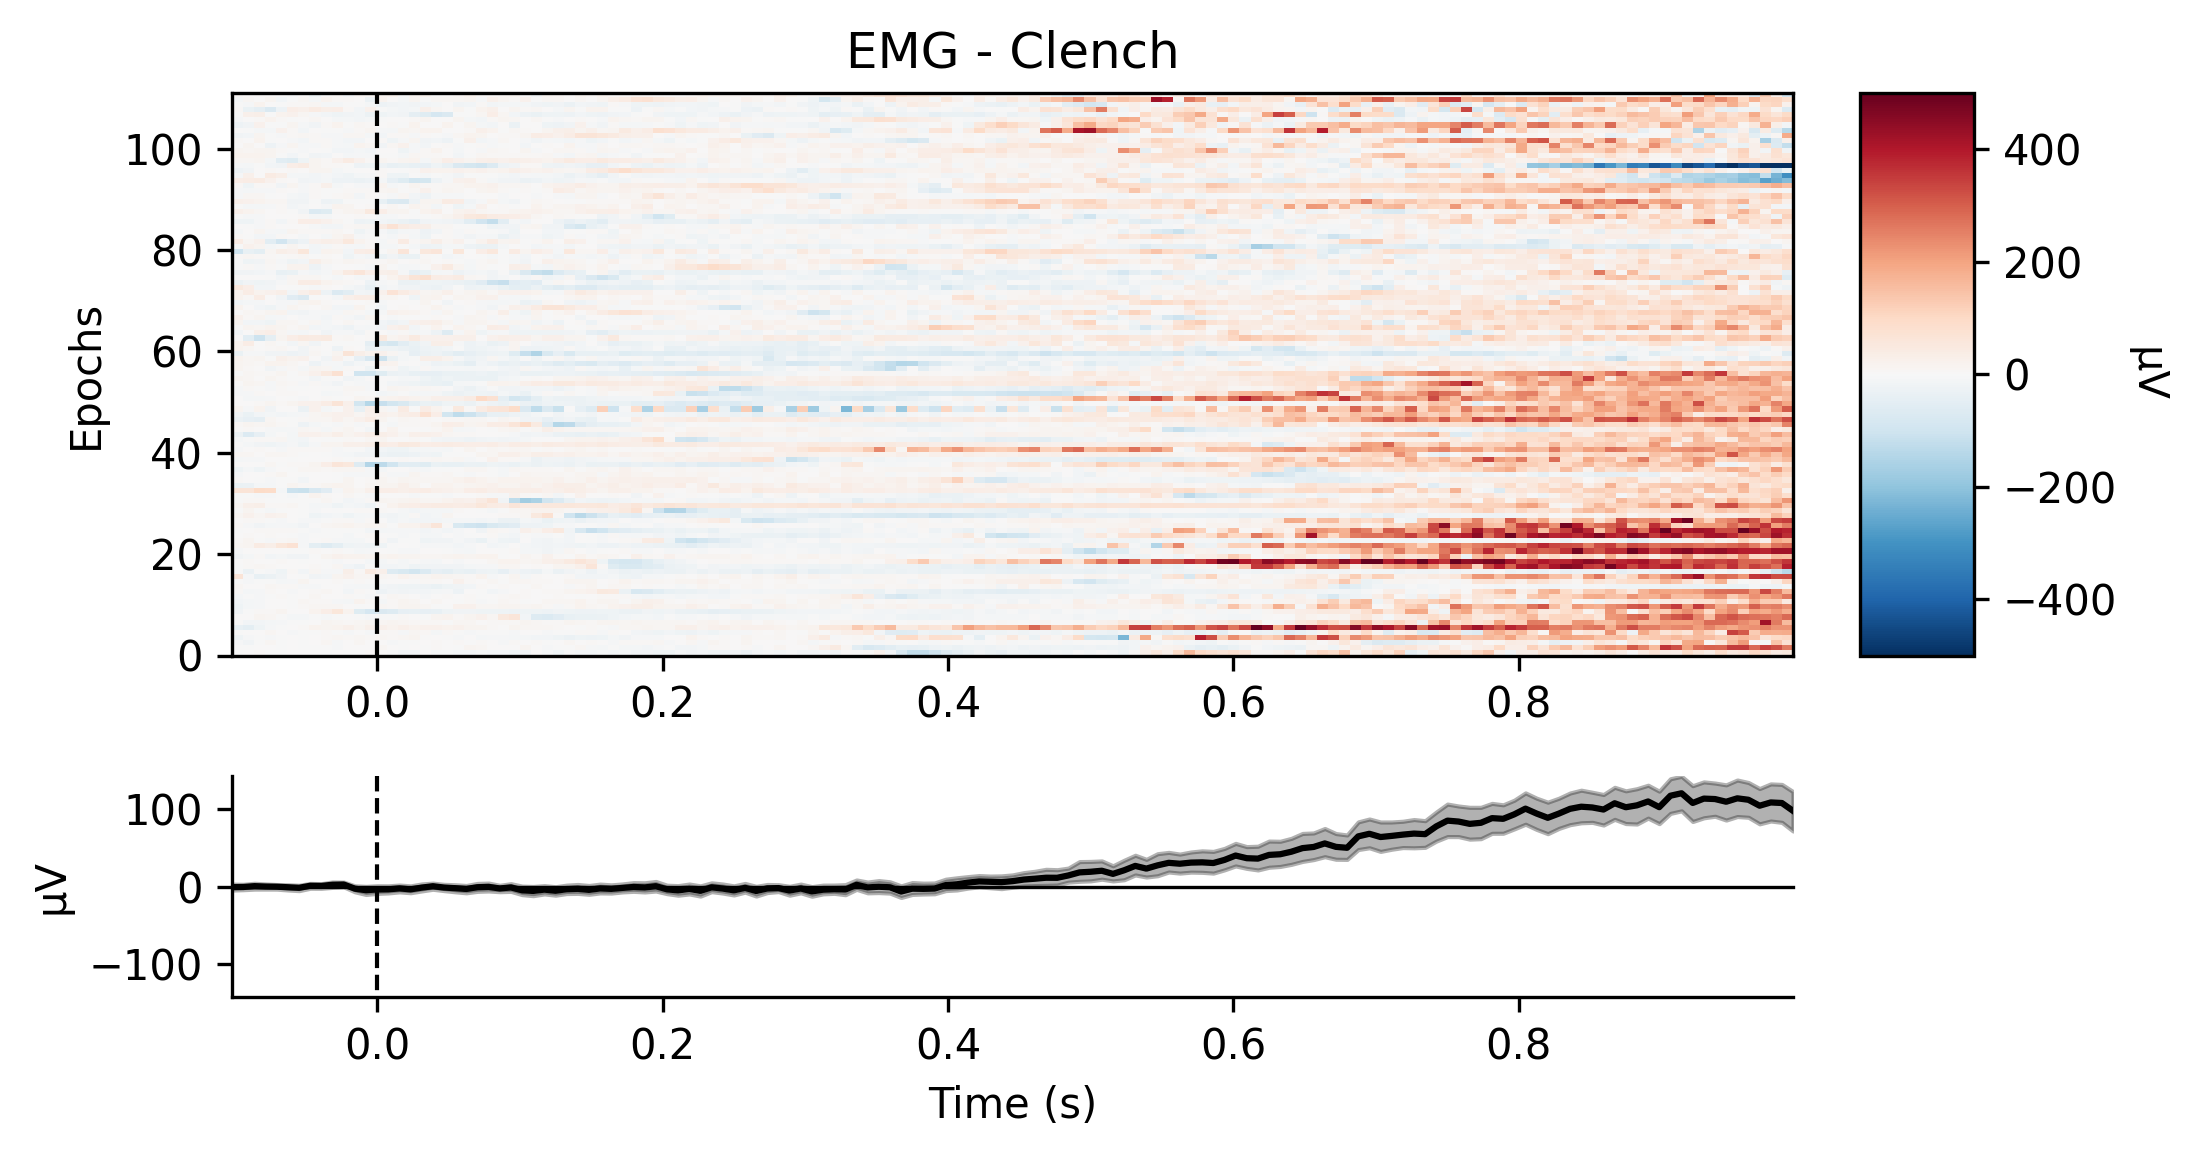

In [44]:
right_epochs = epochs_ds['right']
rest_epochs = epochs_ds['neutral']
clench_epochs = epochs_ds_clench['clench']


pltimg = mne.viz.plot_epochs_image(rest_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Rest')
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(8)
pltimg.set_dpi(300)
pltimg.show()

pltimg = mne.viz.plot_epochs_image(right_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Right')
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(8)
pltimg.set_dpi(300)
pltimg.show()




pltimg = mne.viz.plot_epochs_image(clench_epochs, vmin=-500, vmax=500, picks = "EMG1", show=False, title='EMG - Clench')
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(8)
pltimg.set_dpi(300)
pltimg.show()


# pltimg = left_epochs.plot()
# pltimg = right_epochs.plot_topomap()
# pltimg = neutral_epochs.plot_topomap()

In [ ]:
event_ids = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
}

events = mne.find_events(raw)
reject = dict(eeg=150e-6)
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True, reject=reject, tmin = -0.05, tmax=0.3, picks = ['C3', 'P3', 'C4', 'P4'])
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds = epochs.resample(sfreq=128., n_jobs=job_arg)

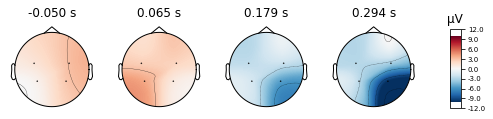

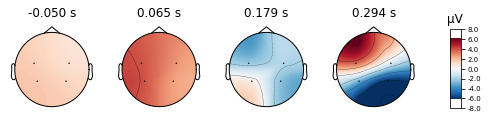

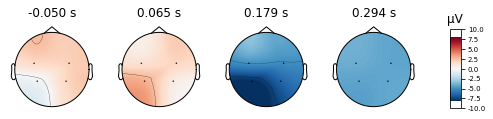

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\4005941810.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\4005941810.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()
C:\Users\webma\AppData\Local\Temp\ipykernel_7456\4005941810.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


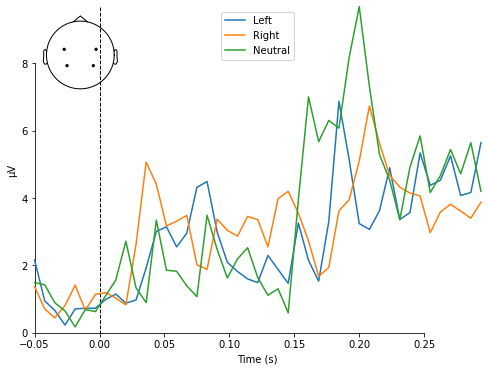

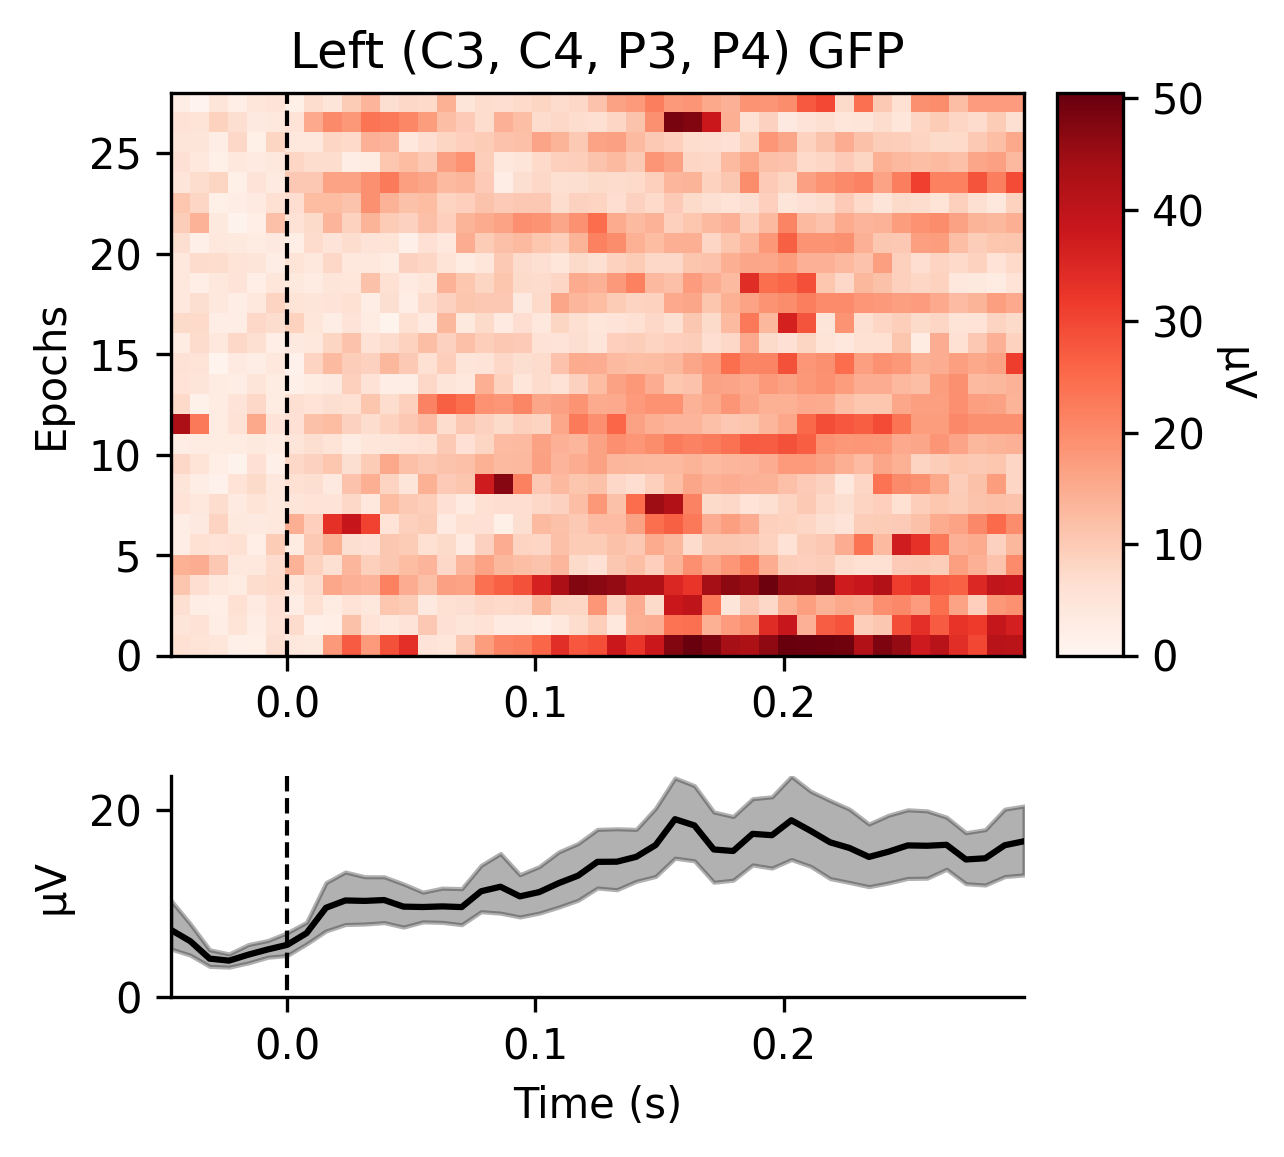

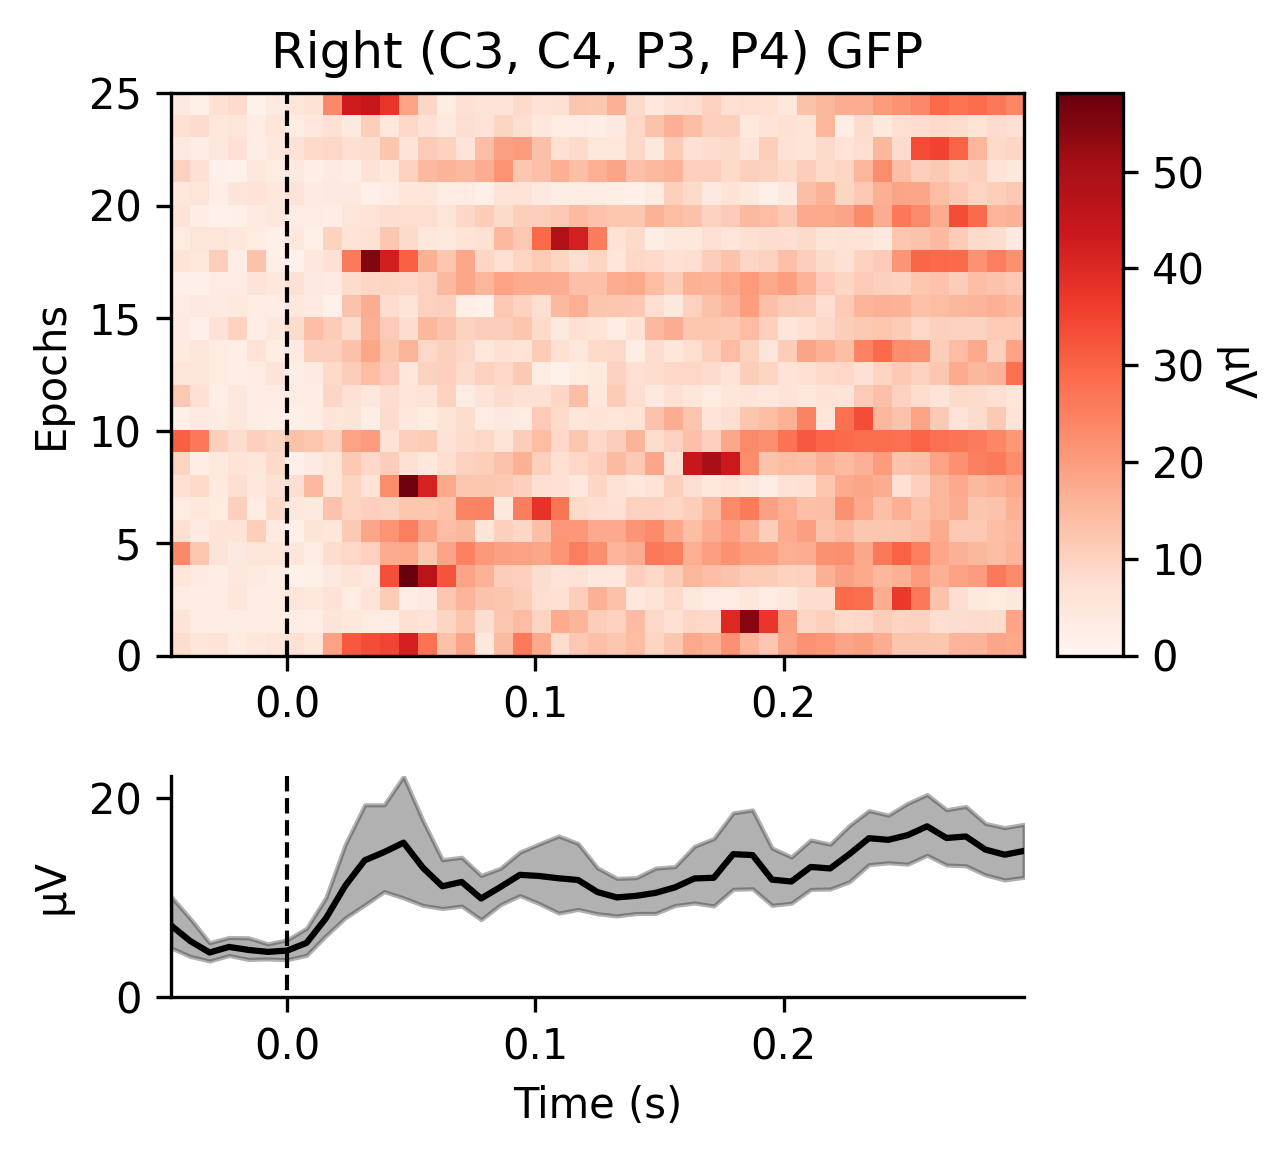

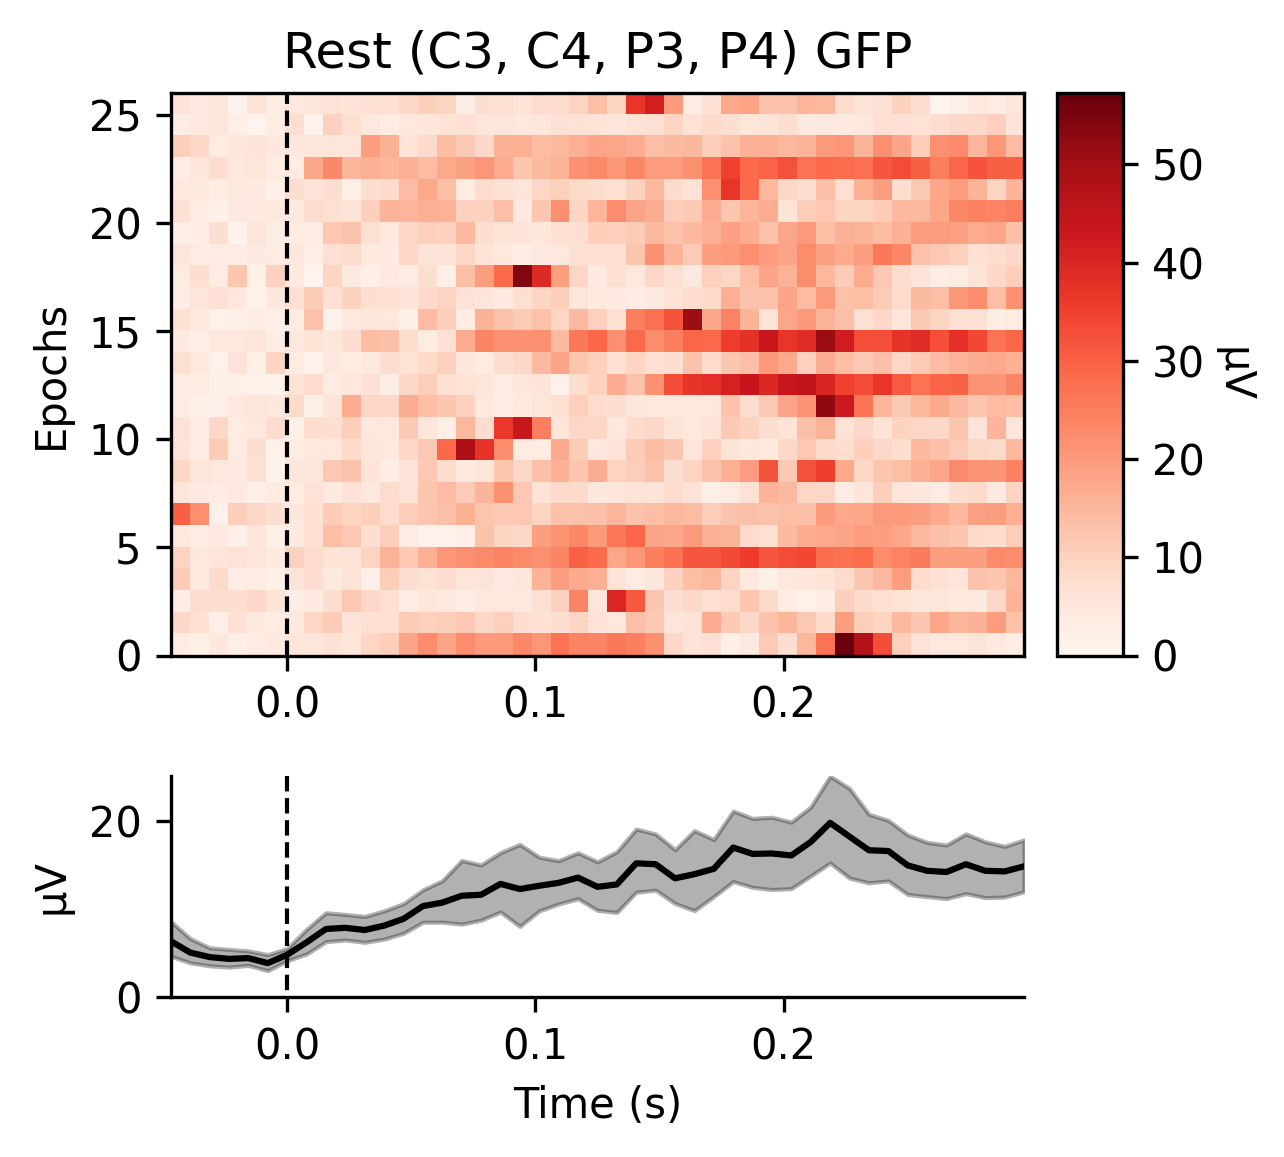

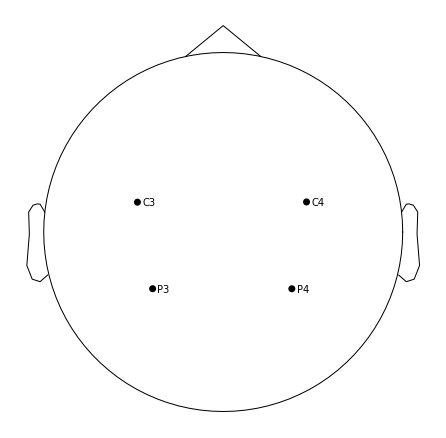

In [30]:
left_epochs = epochs_ds['left']
left_evoked = left_epochs.average()
right_epochs = epochs_ds['right']
right_evoked = right_epochs.average()

neutral_epochs = epochs_ds['neutral']
neutral_evoked = neutral_epochs.average()

chs = ['C3', 'P3', 'C4', 'P4']

pltimg = left_evoked.plot_topomap()
pltimg = right_evoked.plot_topomap()
pltimg = neutral_evoked.plot_topomap()

mne.viz.plot_compare_evokeds(dict(Left=left_evoked, Right=right_evoked, Neutral=neutral_evoked), legend='upper center', show_sensors='upper left', show = False)

pltimg = left_epochs.plot_image(picks=chs, evoked = True, group_by = dict(Left = [0,1,2,3]), title = 'Left (C3, C4, P3, P4) GFP', show = False)
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(4)
pltimg.set_dpi(300)
pltimg.show()

pltimg = right_epochs.plot_image(picks=chs, evoked = True, group_by = dict(Right = [0,1,2,3]), title = 'Right (C3, C4, P3, P4) GFP', show = False)
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(4)
pltimg.set_dpi(300)
pltimg.show()

pltimg = neutral_epochs.plot_image(picks=chs, evoked = True, group_by = dict(Neutral = [0,1,2,3]), title = 'Rest (C3, C4, P3, P4) GFP', show = False)
pltimg = pltimg[0]
pltimg.set_figheight(4)
pltimg.set_figwidth(4)
pltimg.set_dpi(300)
pltimg.show()
pltimg = left_epochs.plot_sensors(show_names=True)

# pltimg = left_epochs.plot_image(picks=['C3', 'P3', 'C4', 'P4'])
# pltimg = right_epochs.plot_image(picks=['C3', 'P3', 'C4', 'P4'])
# pltimg = neutral_epochs.plot_image(picks=['C3', 'P3', 'C4', 'P4'])

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
241 events found
Event IDs: [ 53 102 107 108 110 114]
Not setting metadata
240 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 4501 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'P3', 'C4', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'C4', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'C4', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'C4', 'P4']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'C4', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'C4', 'P4']
    Rejectin

C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()
C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()
C:\Users\webma\AppData\Local\Temp\ipykernel_7456\322233529.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pltimg.show()


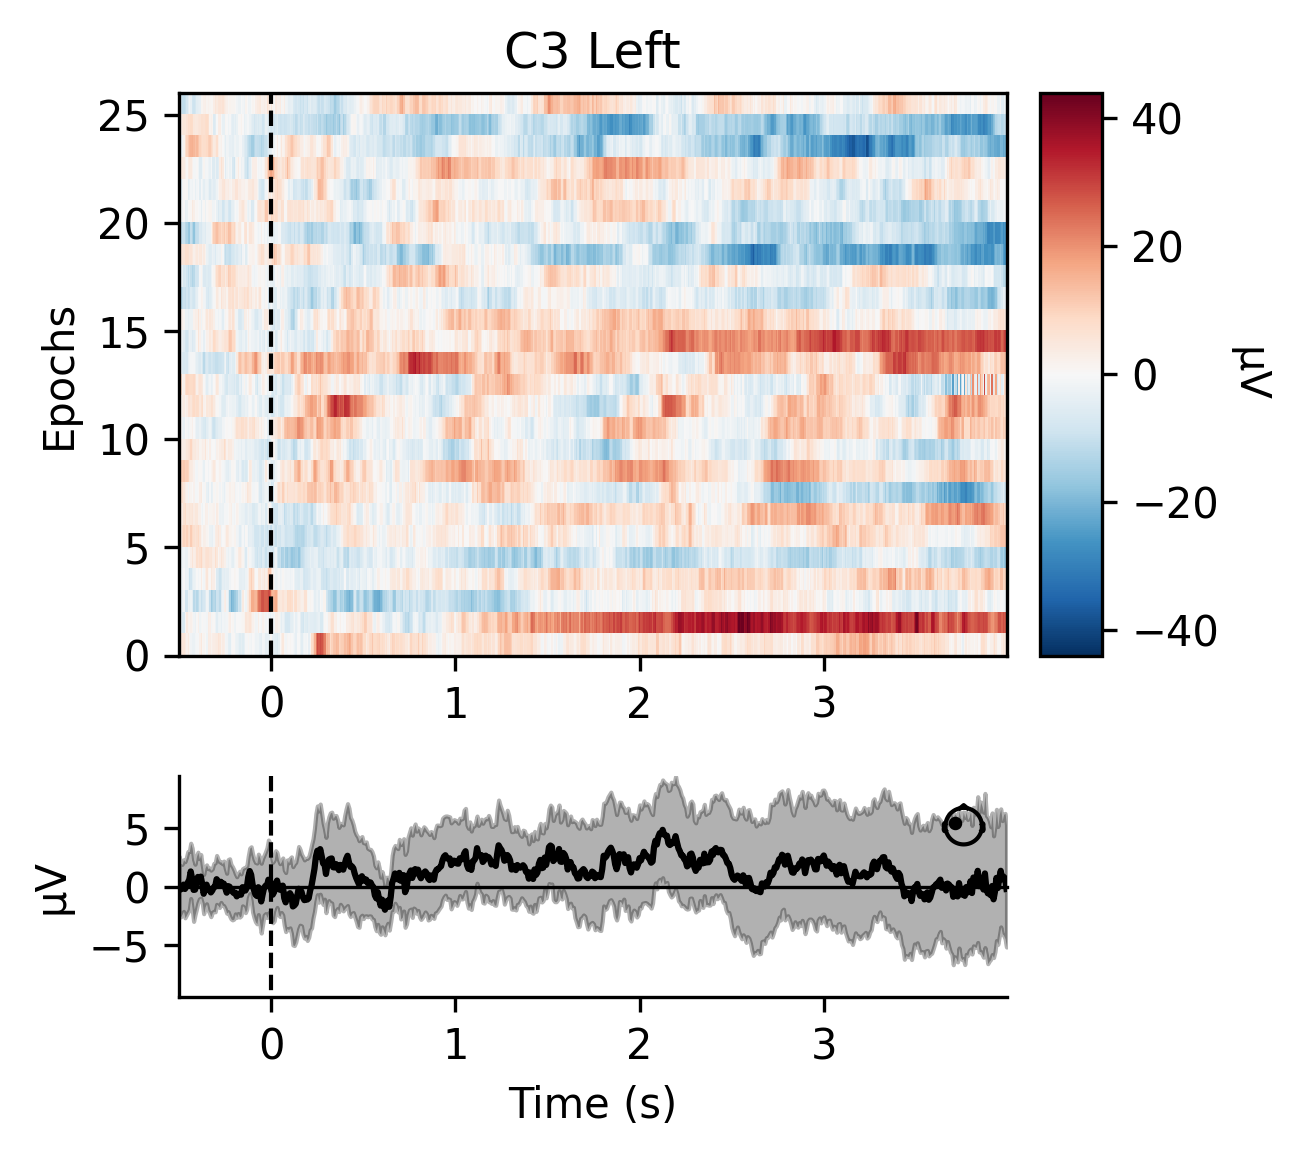

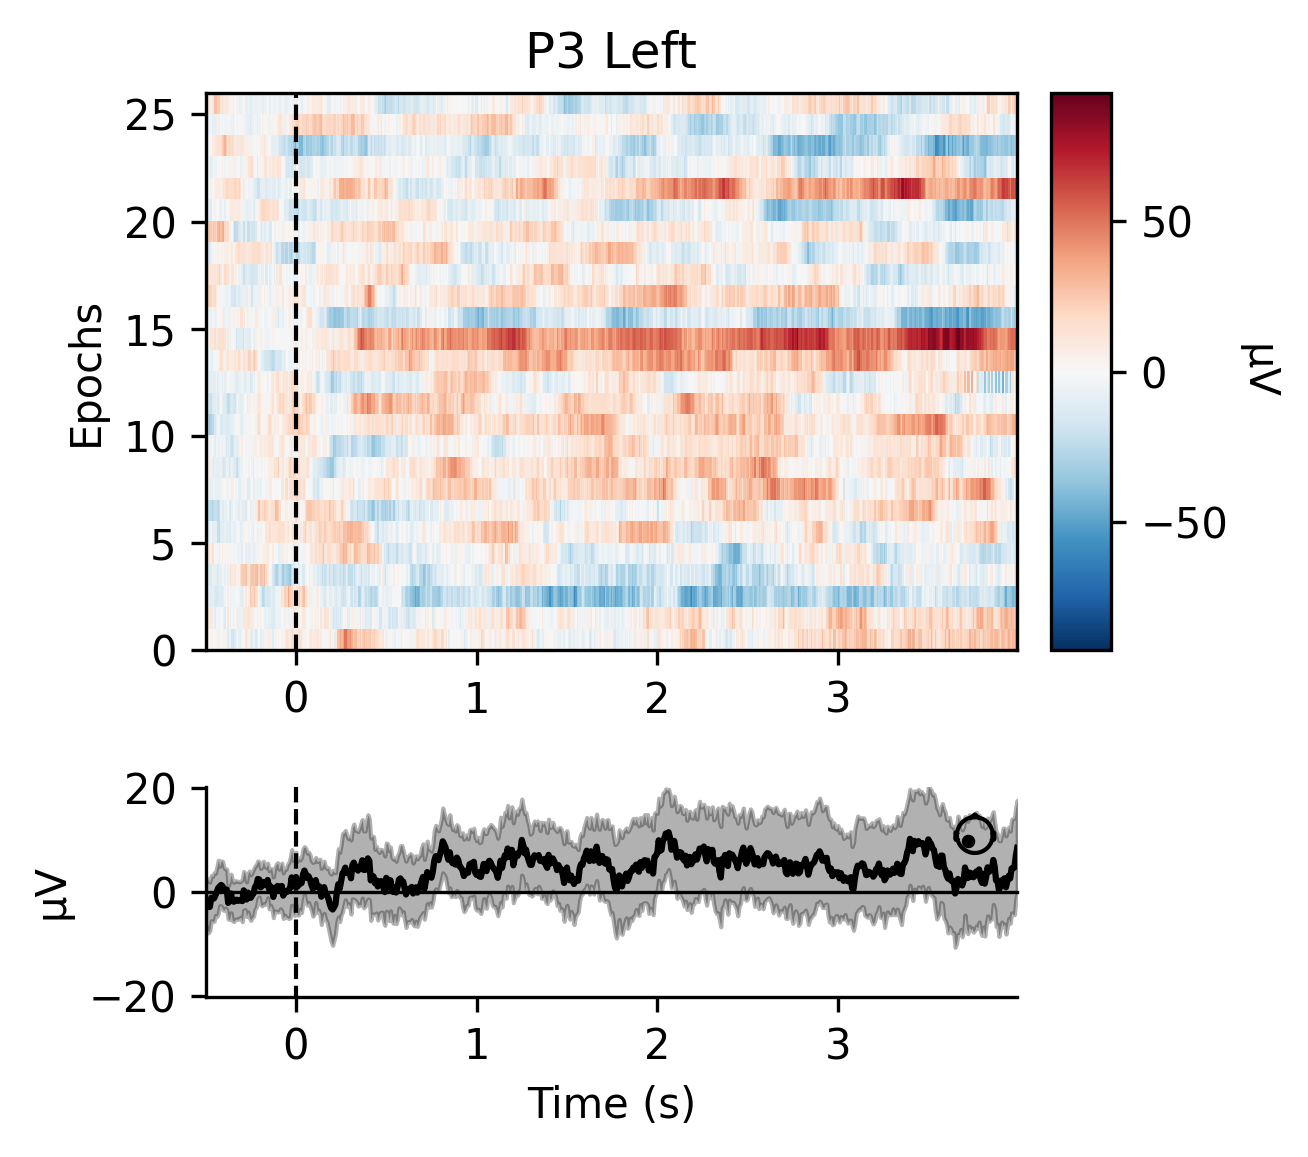

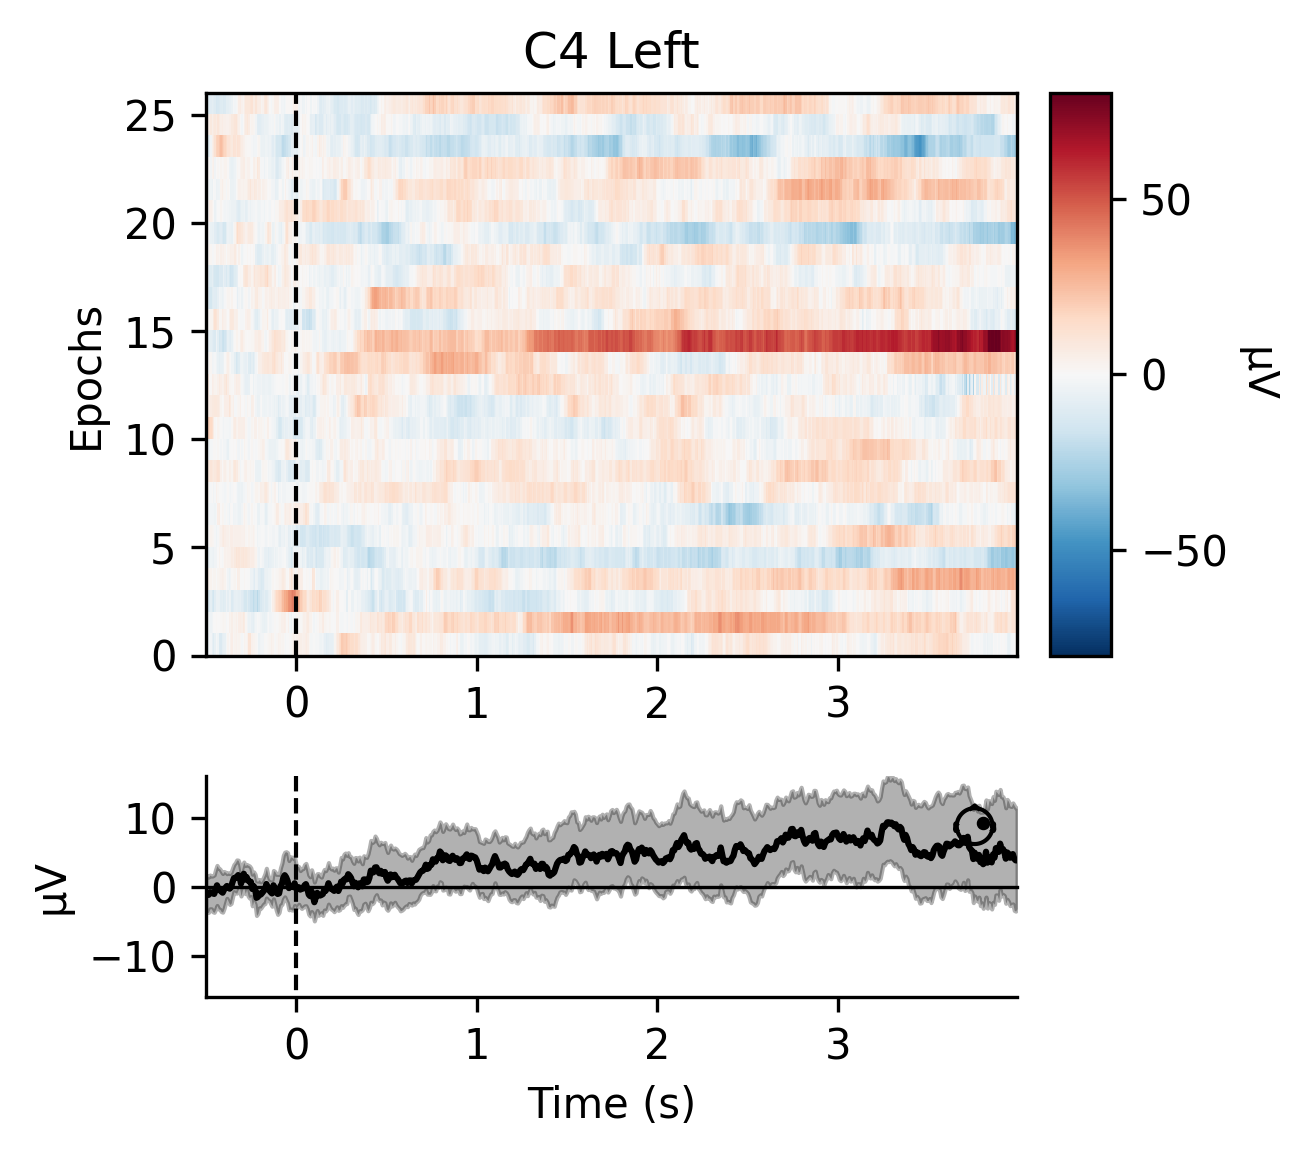

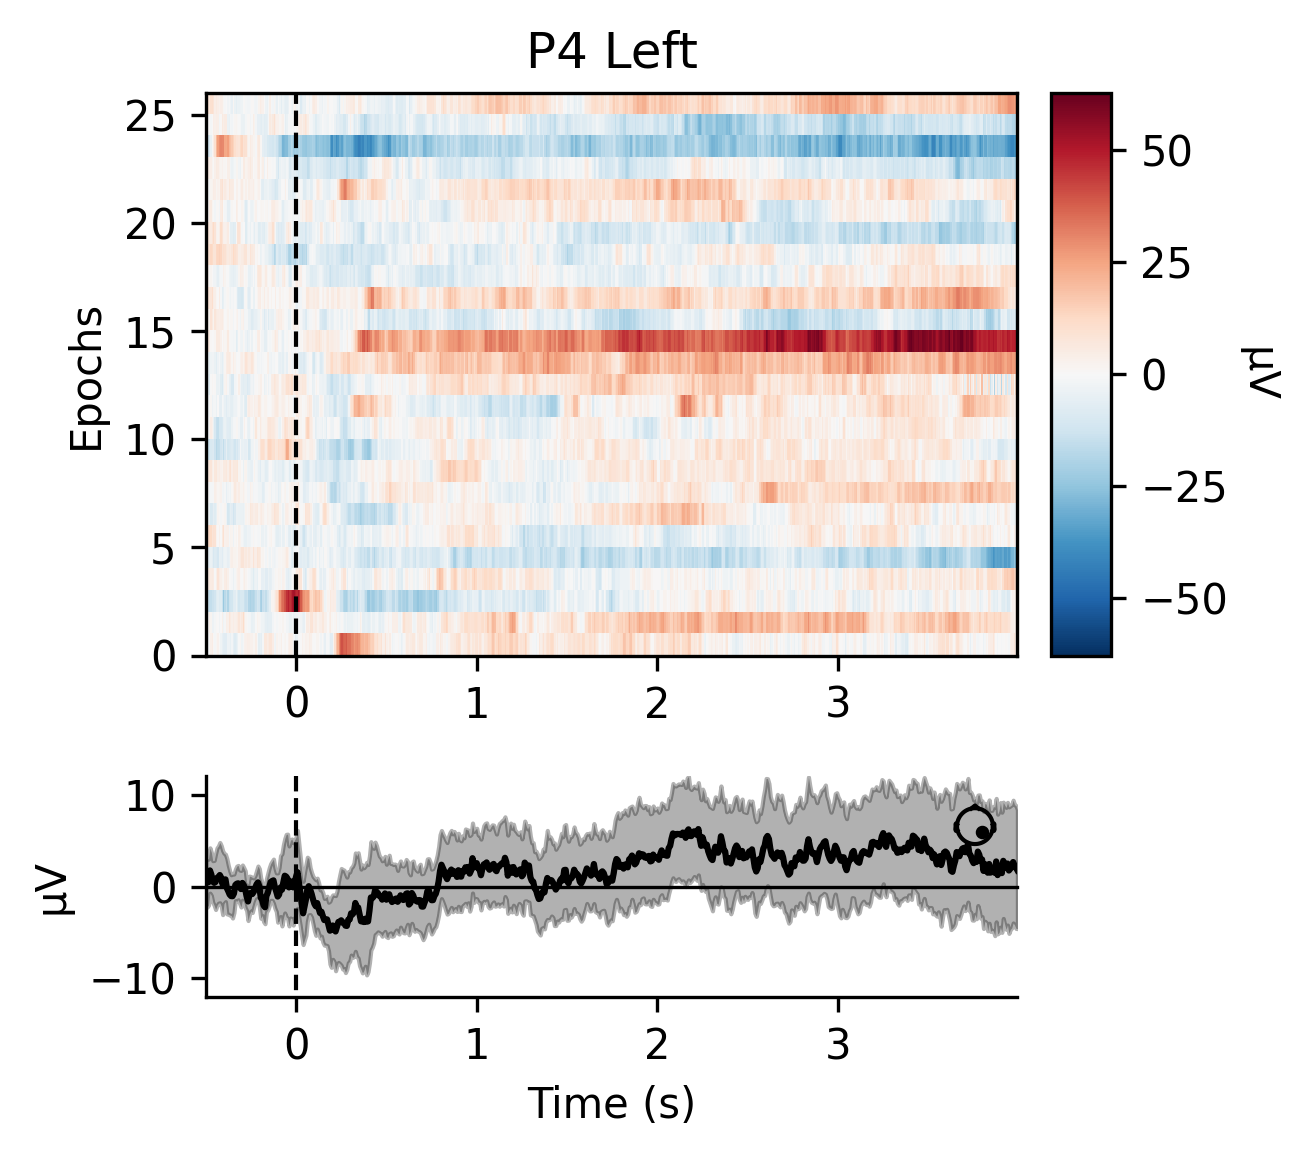

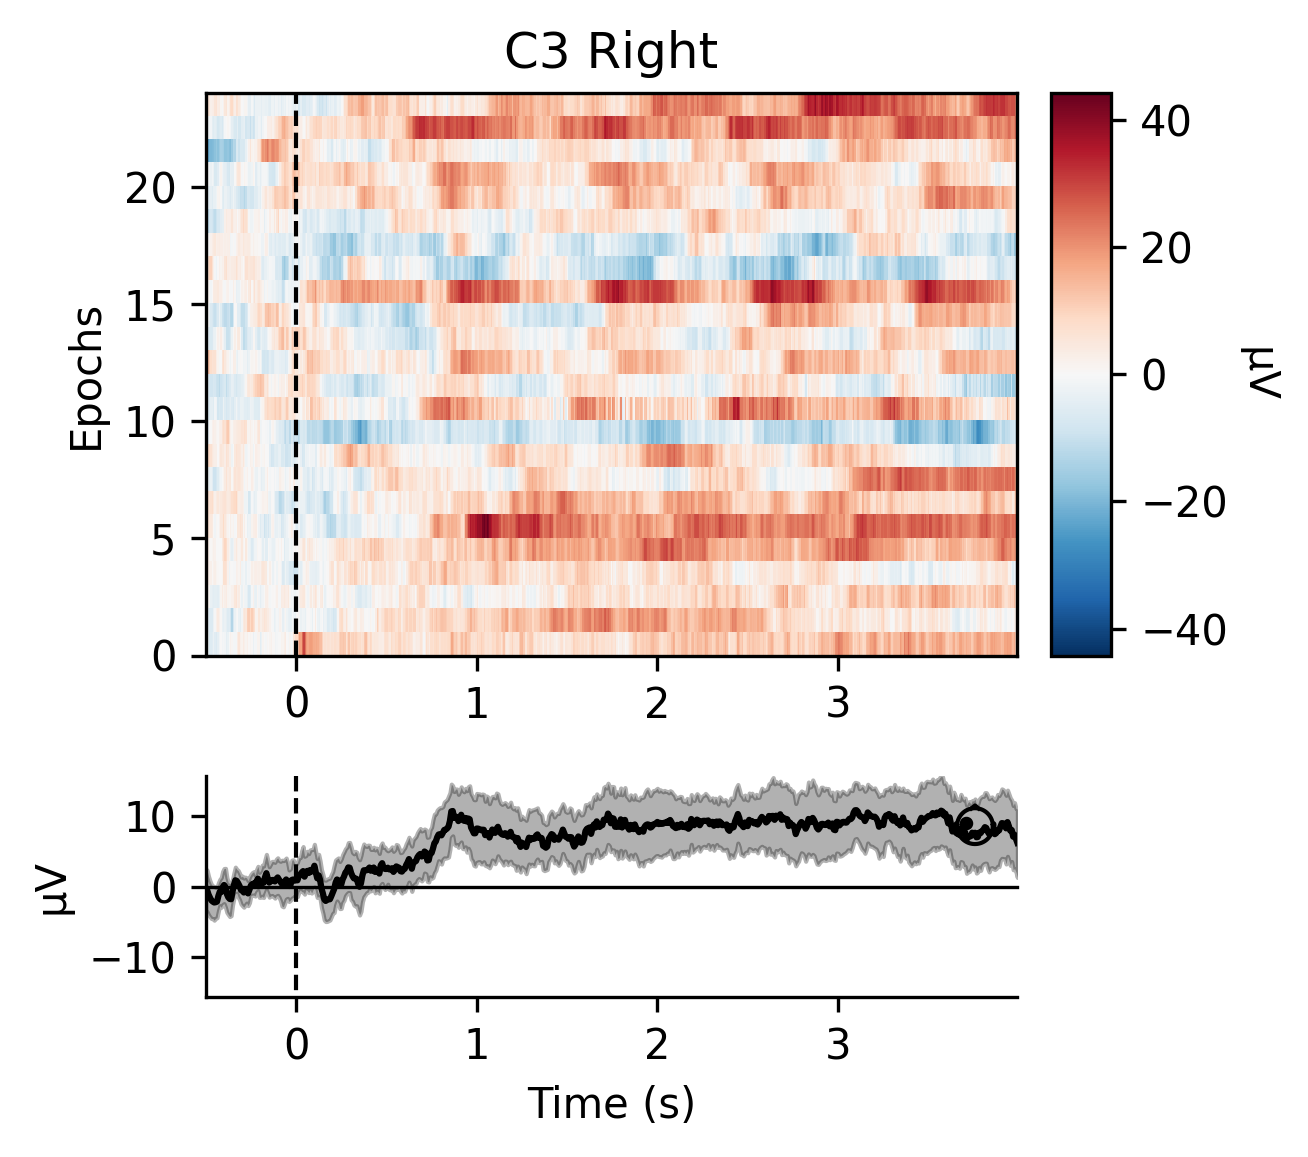

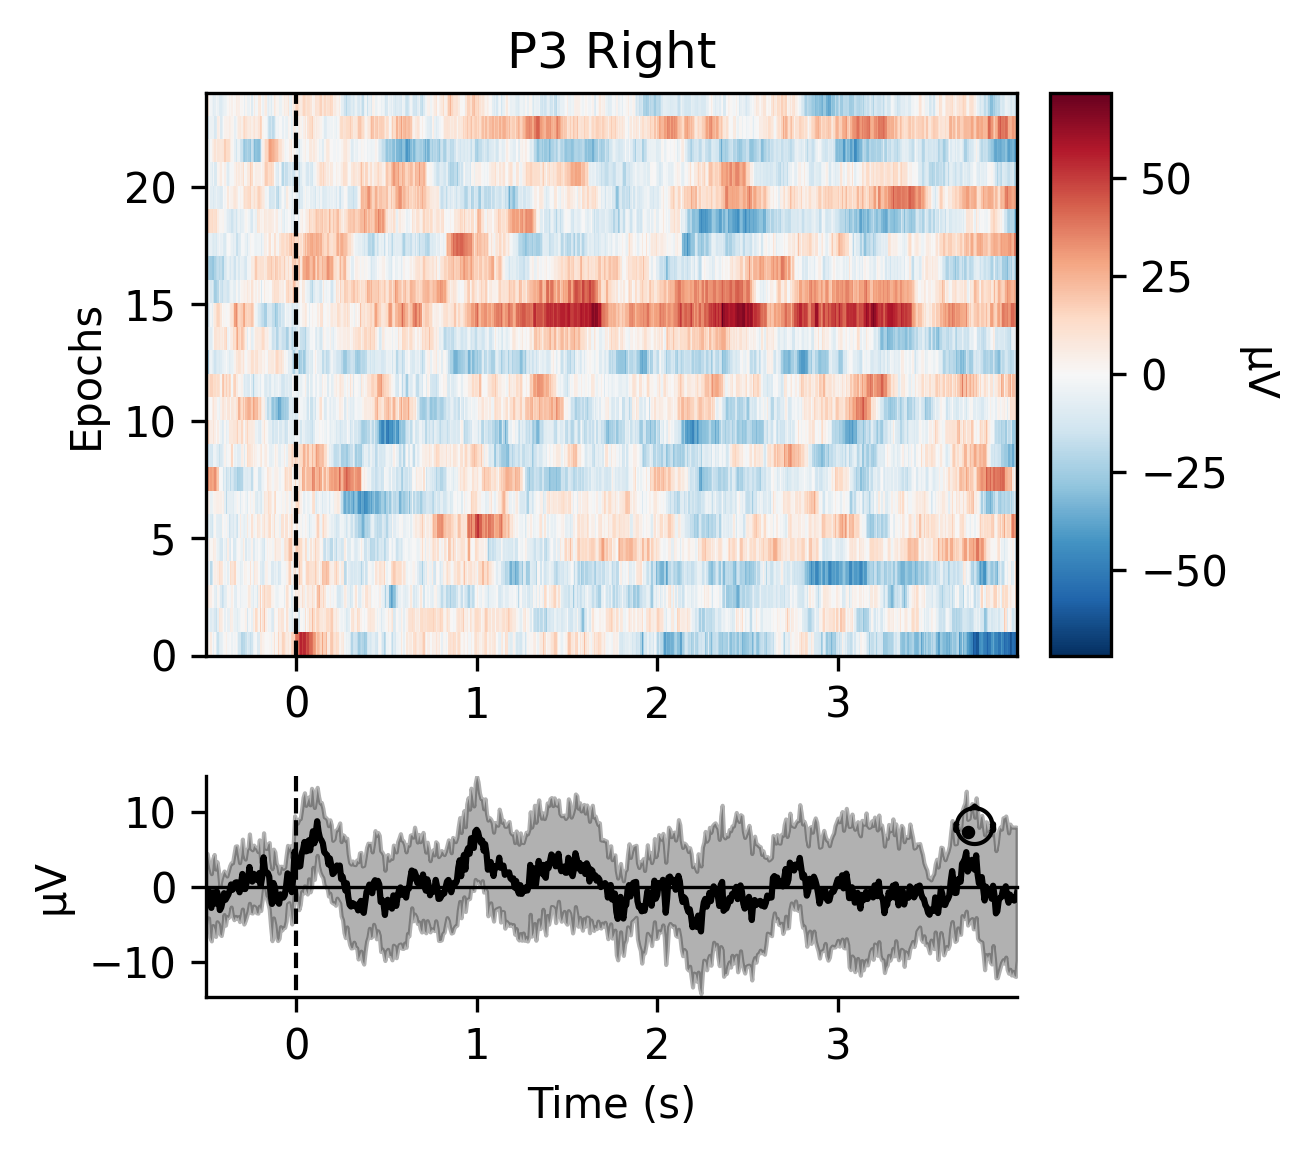

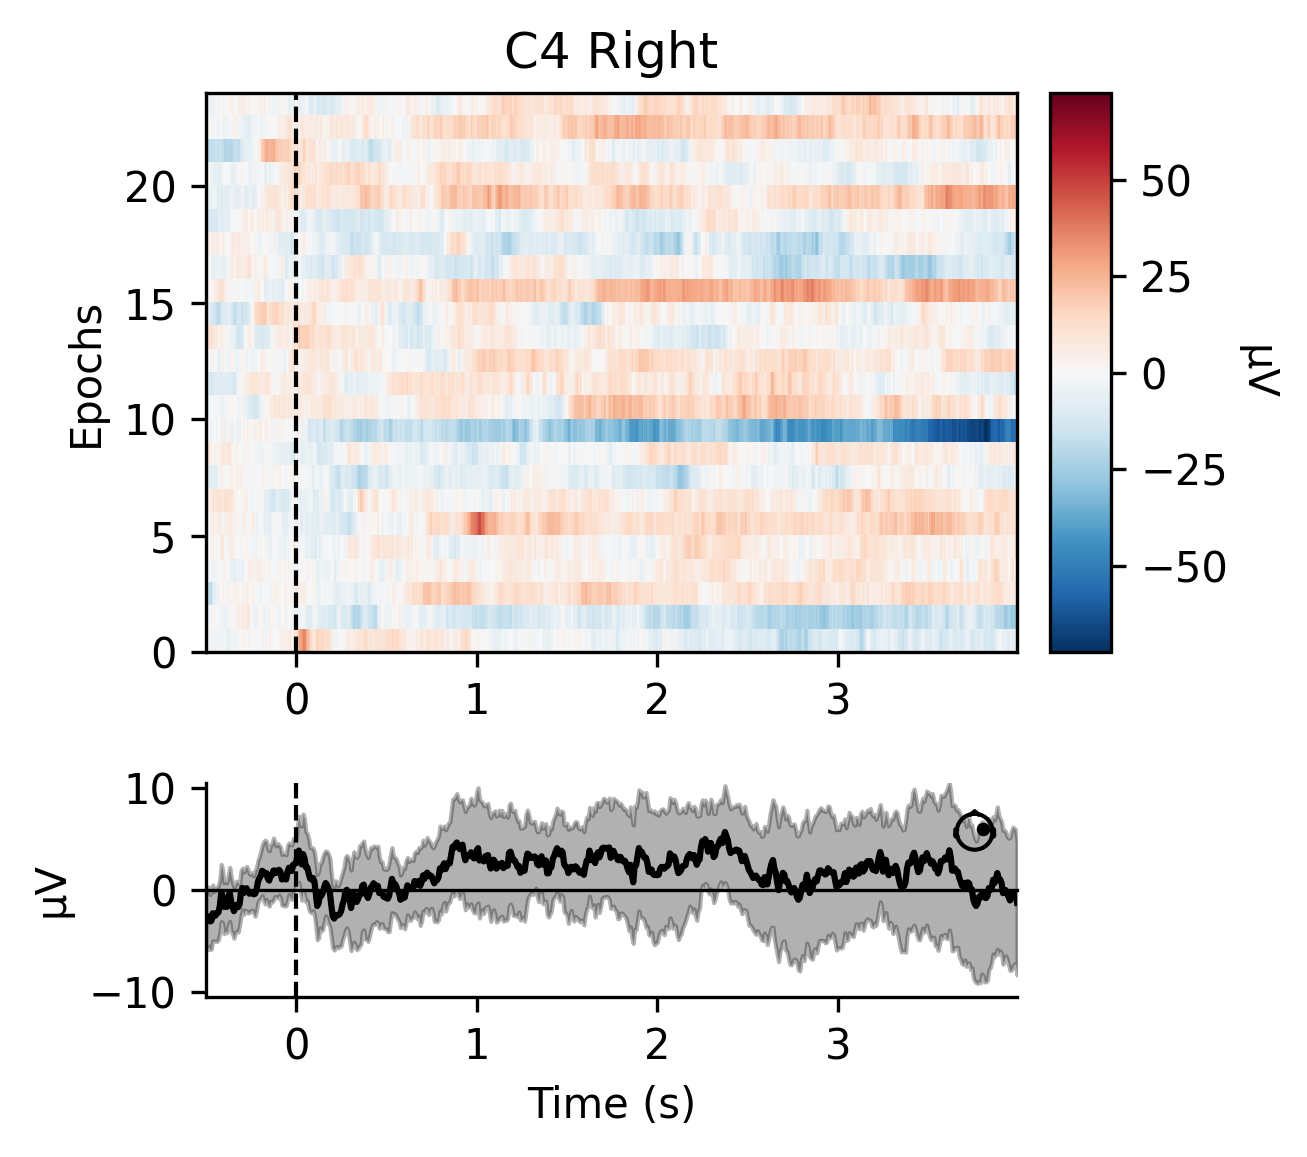

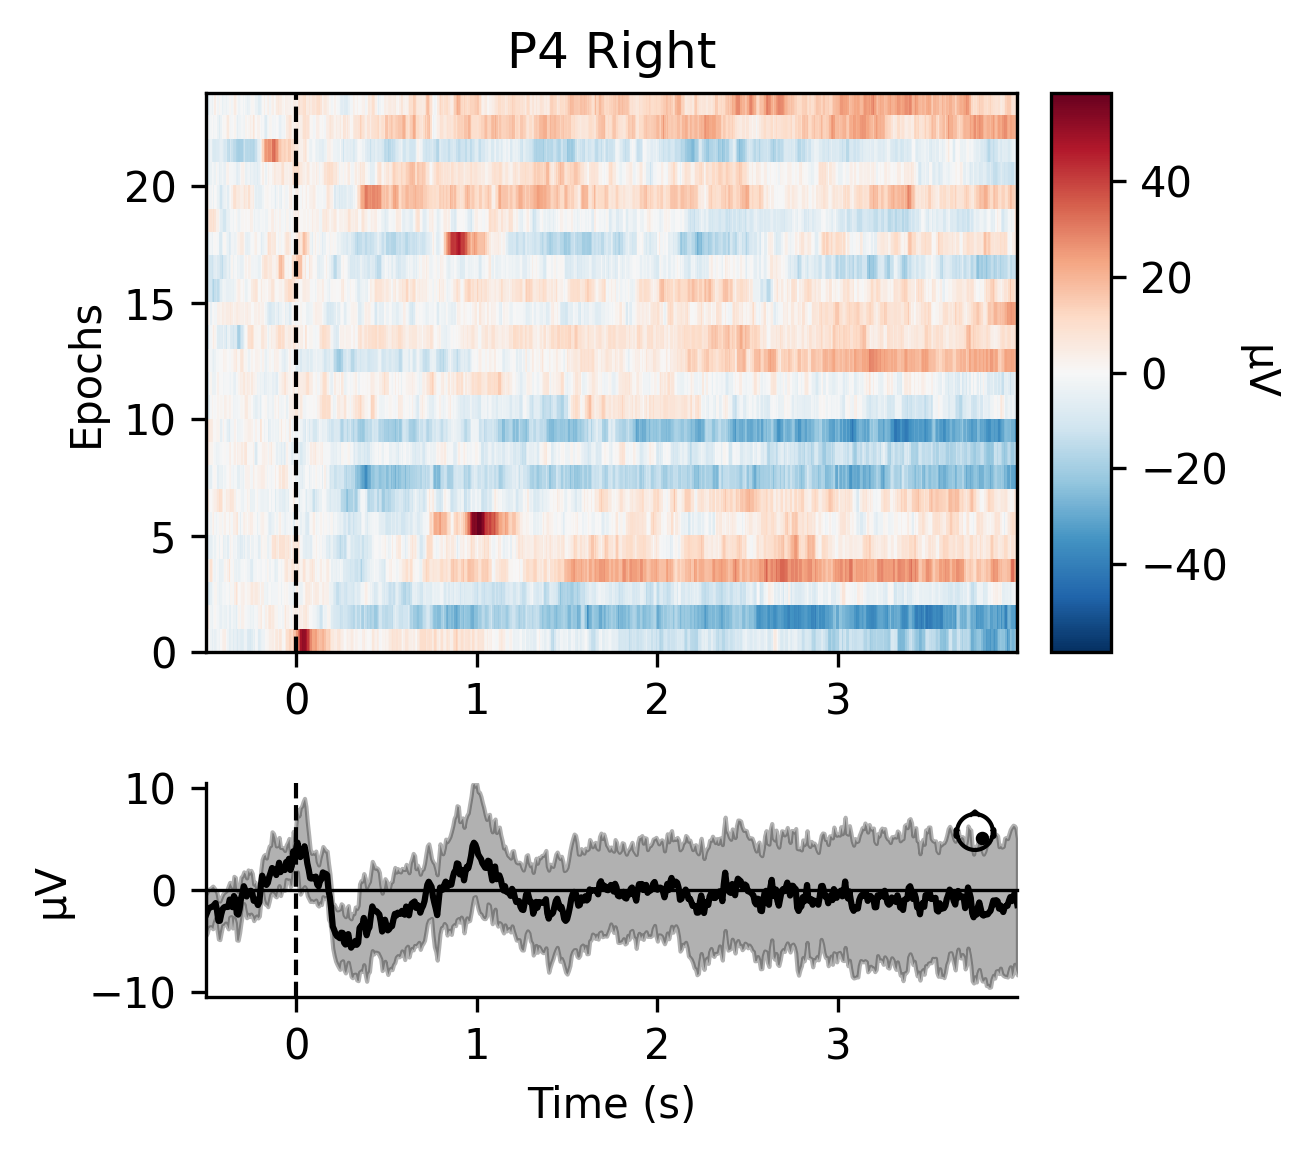

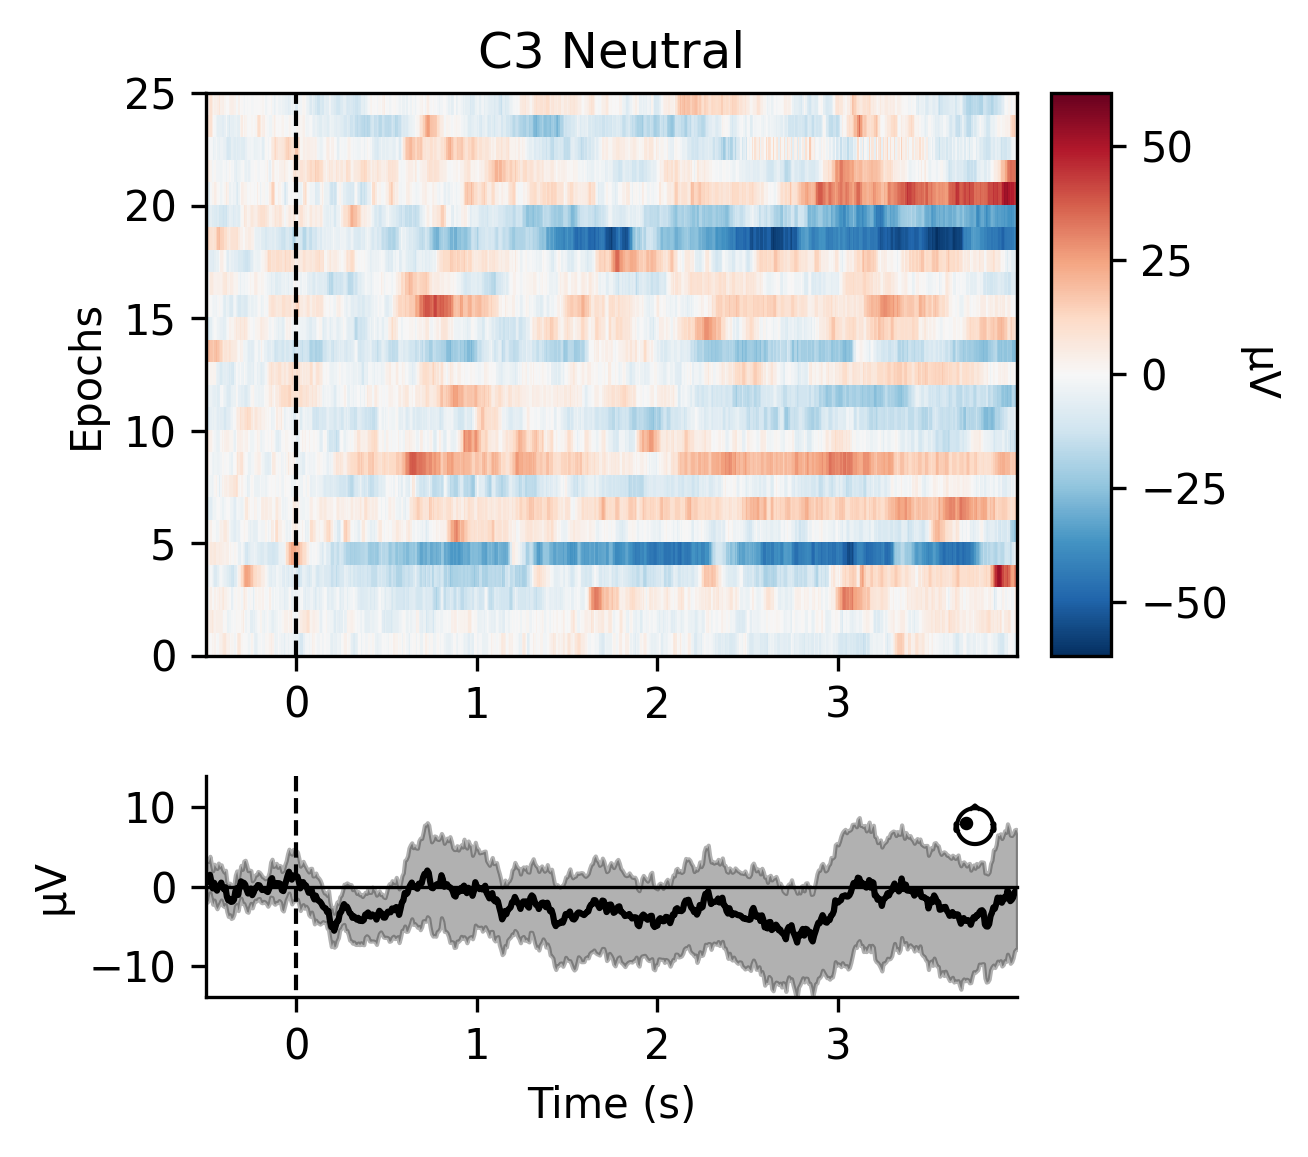

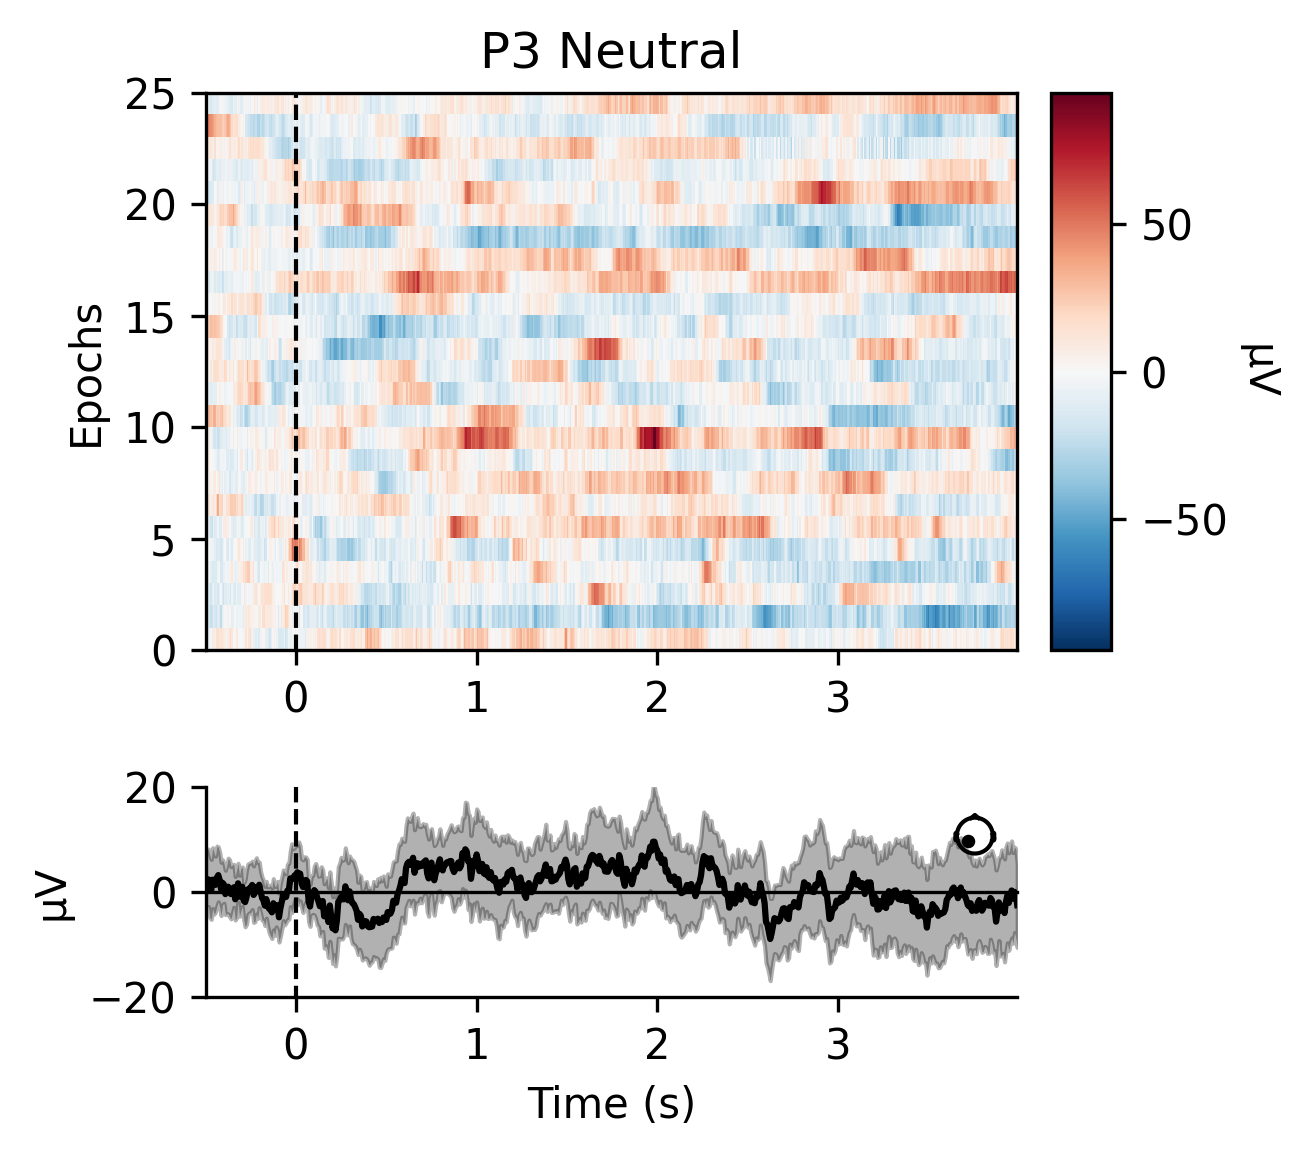

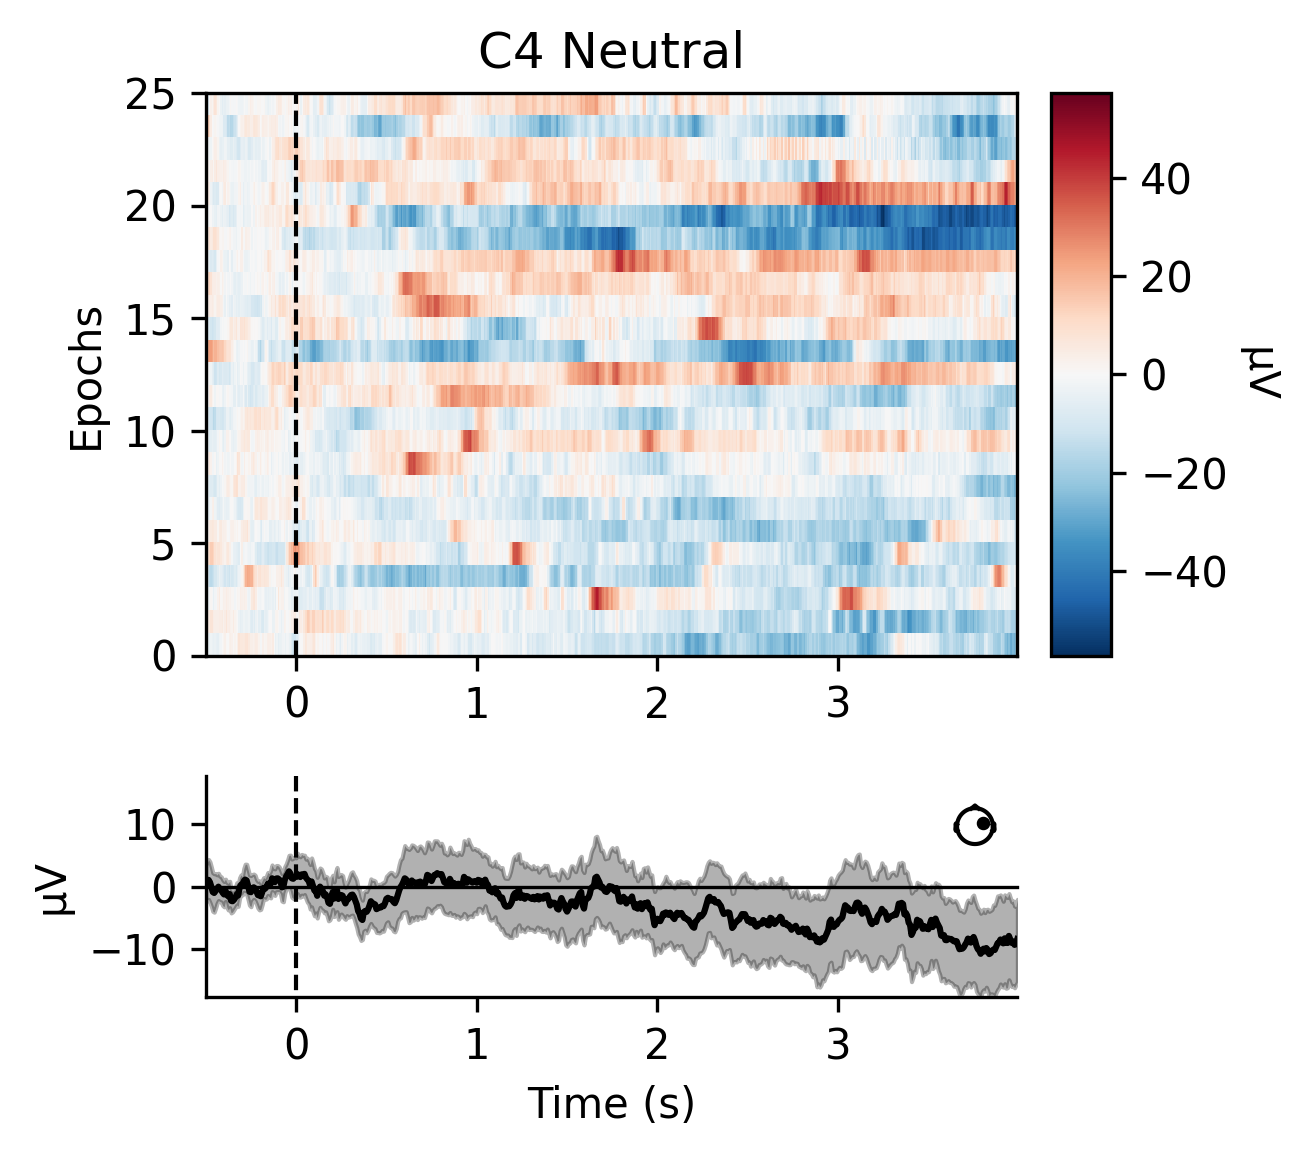

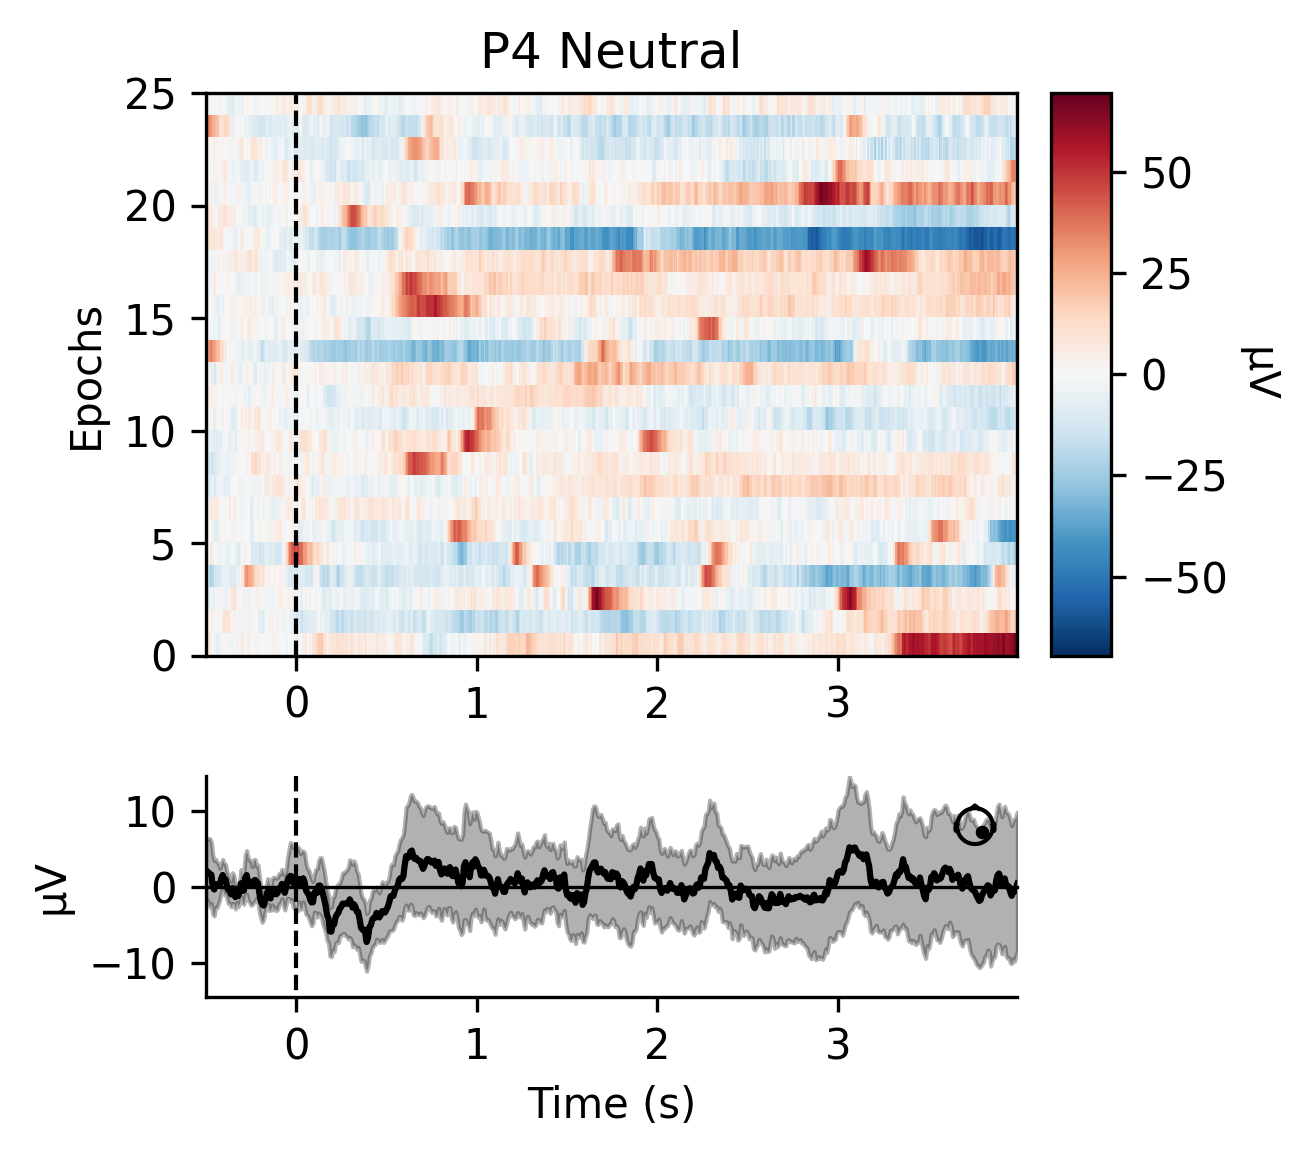

In [17]:
# re epoch to include 4 second window.


chs = ['C3', 'P3', 'C4', 'P4']
raw.set_eeg_reference()
event_ids = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
}

events = mne.find_events(raw)
reject = dict(eeg=150e-6)
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True, reject=reject, tmin = -0.5, tmax=4, picks = ['C3', 'P3', 'C4', 'P4'])
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds = epochs.resample(sfreq=128., n_jobs=job_arg)

left_epochs = epochs_ds['left']
# left_evoked = left_epochs.average()
right_epochs = epochs_ds['right']
# right_evoked = right_epochs.average()

neutral_epochs = epochs_ds['neutral']
# neutral_evoked = neutral_epochs.average()

for lbl, evt in {"Left": left_epochs, "Right": right_epochs, "Neutral": neutral_epochs}.items():
  for ch in chs:
    pltimg = evt.plot_image(picks=ch, evoked = True, title = '{} {}'.format(ch, lbl), show = False)
    pltimg = pltimg[0]
    pltimg.set_figheight(4)
    pltimg.set_figwidth(4)
    pltimg.set_dpi(300)
    pltimg.show()


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


C:\Users\webma\AppData\Local\Temp\ipykernel_14344\3617540954.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pevkd.show()


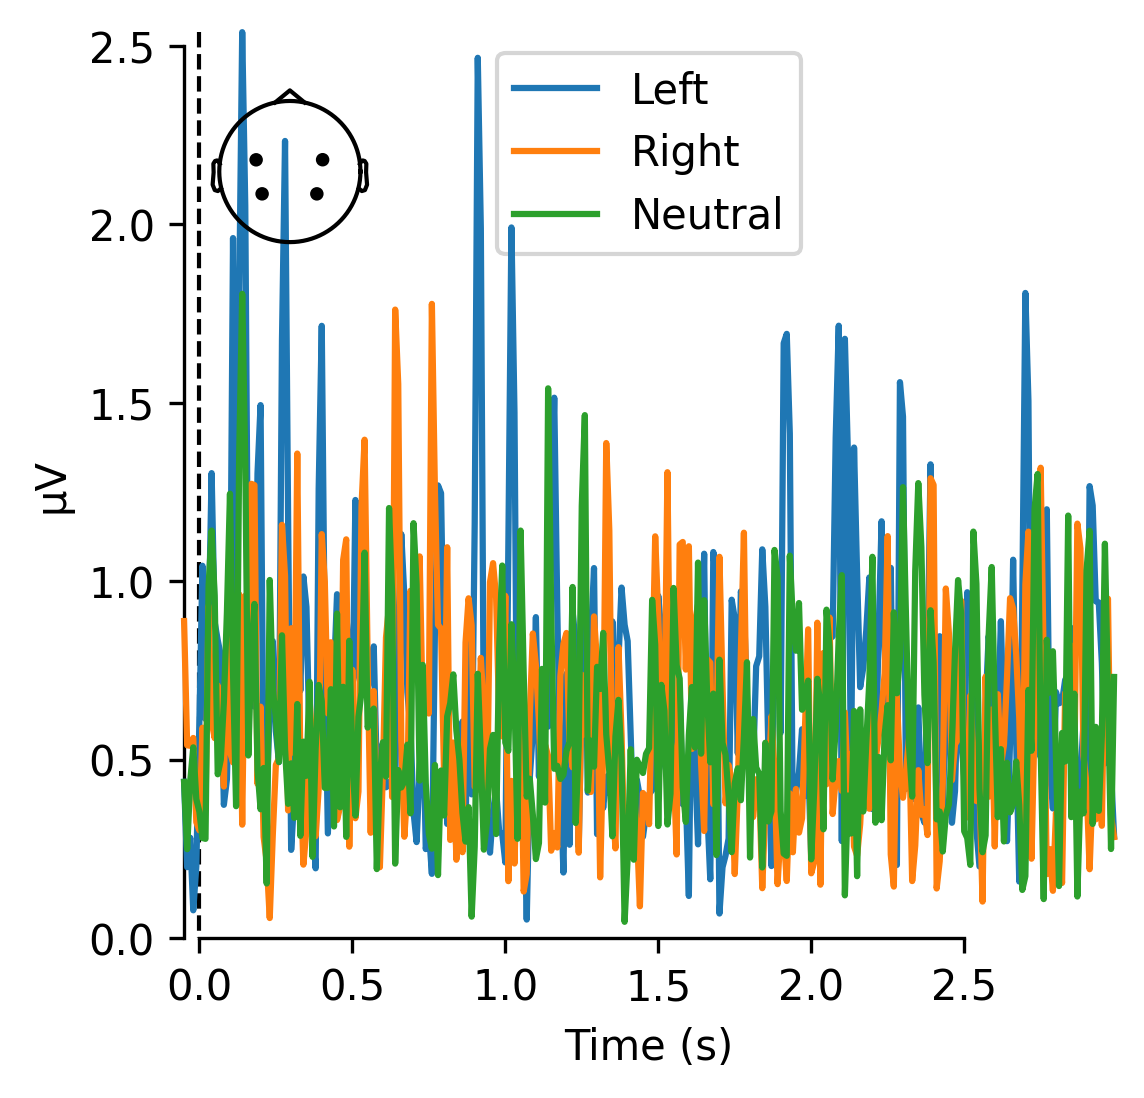

In [38]:
left_evoked = left_epochs.average()
right_evoked = right_epochs.average()
neutral_evoked = neutral_epochs.average()

pevkd = mne.viz.plot_compare_evokeds(dict(Left=left_evoked, Right=right_evoked, Neutral=neutral_evoked), legend='upper center', show_sensors='upper left', show = False)
pevkd = pevkd[0]
pevkd.set_figheight(4)
pevkd.set_figwidth(4)
pevkd.set_dpi(300)
pevkd.show()


No projector specified for this dataset. Please consider the method self.add_proj.


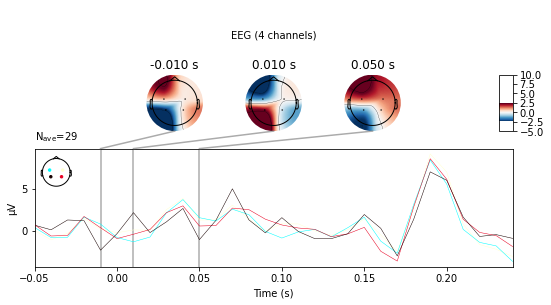

No projector specified for this dataset. Please consider the method self.add_proj.


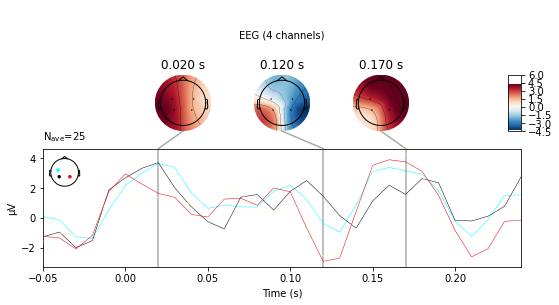

No projector specified for this dataset. Please consider the method self.add_proj.


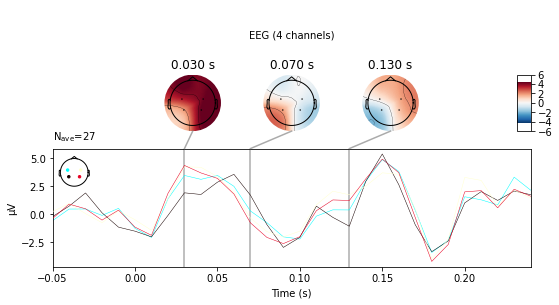

In [25]:
fp = left_evoked.plot_joint(picks = 'eeg', exclude = None)
fp = right_evoked.plot_joint(picks = 'eeg', exclude = None)
fp = neutral_evoked.plot_joint(picks = 'eeg', exclude = None)